# Adopción digital

# Importar librerías y Cargar datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sb
from sklearn.impute import SimpleImputer

In [2]:
# MEN
MEN = pd.read_csv("MEN.csv", delimiter=",")

In [3]:
# ICFES
ICFES_2018_1 = pd.read_csv("Examen_Saber_11_20181.txt", delimiter=";")
ICFES_2018_2 = pd.read_csv("Examen_Saber_11_20182.txt", delimiter=";")
ICFES_2023_1 = pd.read_csv("Examen_Saber_11_20231.txt", delimiter=";")
ICFES_2023_2 = pd.read_csv("Examen_Saber_11_20232.txt", delimiter=";")
ICFES_2018_1 = ICFES_2018_1[
    [
        "periodo",
        "estu_consecutivo",
        "estu_genero",
        "estu_cod_reside_mcpio",
        "estu_mcpio_reside",
        "estu_pais_reside",
        "fami_estratovivienda",
        "fami_tieneinternet"
    ]
]
ICFES_2018_2 = ICFES_2018_2[
    [
        "periodo",
        "estu_consecutivo",
        "estu_genero",
        "estu_cod_reside_mcpio",
        "estu_mcpio_reside",
        "estu_pais_reside",
        "fami_estratovivienda",
        "fami_tieneinternet"
    ]
]
ICFES_2023_1 = ICFES_2023_1[
    [
        "periodo",
        "estu_consecutivo",
        "estu_genero",
        "estu_cod_reside_mcpio",
        "estu_mcpio_reside",
        "estu_pais_reside",
        "fami_estratovivienda",
        "fami_tieneinternet"
    ]
]
ICFES_2023_2 = ICFES_2023_2[
    [
        "periodo",
        "estu_consecutivo",
        "estu_genero",
        "estu_cod_reside_mcpio",
        "estu_mcpio_reside",
        "estu_pais_reside",
        "fami_estratovivienda",
        "fami_tieneinternet"
    ]
]
# Convertir columnas a mayúsculas
ICFES_2018_1.columns = ICFES_2018_1.columns.str.upper()
ICFES_2018_2.columns = ICFES_2018_2.columns.str.upper()
ICFES_2023_1.columns = ICFES_2023_1.columns.str.upper()
ICFES_2023_2.columns = ICFES_2023_2.columns.str.upper()

/tmp/ipython-input-1672992869.py:2: DtypeWarning: Columns (4,5,6,7,13,14,15,16,17,18,19,20,31,32,40,46,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  ICFES_2018_1 = pd.read_csv("Examen_Saber_11_20181.txt", delimiter=";")
/tmp/ipython-input-1672992869.py:3: DtypeWarning: Columns (4,5,6,7,13,14,15,16,17,18,19,20,31,32,41,47,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  ICFES_2018_2 = pd.read_csv("Examen_Saber_11_20182.txt", delimiter=";")
/tmp/ipython-input-1672992869.py:4: DtypeWarning: Columns (4,5,6,7,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ICFES_2023_1 = pd.read_csv("Examen_Saber_11_20231.txt", delimiter=";")
/tmp/ipython-input-1672992869.py:5: DtypeWarning: Columns (4,5,6,7,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on

# Análisis preiliminar de los datos

## MEN

In [4]:
MEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          14585 non-null  int64  
 1   CÓDIGO_MUNICIPIO             14585 non-null  int64  
 2   MUNICIPIO                    14585 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          14585 non-null  int64  
 4   DEPARTAMENTO                 14585 non-null  object 
 5   CÓDIGO_ETC                   14585 non-null  float64
 6   ETC                          14585 non-null  object 
 7   POBLACIÓN_5_16               14579 non-null  object 
 8   TASA_MATRICULACIÓN_5_16      14470 non-null  object 
 9   COBERTURA_NETA               14474 non-null  object 
 10  COBERTURA_NETA_TRANSICIÓN    14533 non-null  object 
 11  COBERTURA_NETA_PRIMARIA      14494 non-null  object 
 12  COBERTURA_NETA_SECUNDARIA    14491 non-null  object 
 13  COBERTURA_NETA_M

In [5]:
MEN = MEN[["AÑO", "CÓDIGO_MUNICIPIO", "MUNICIPIO", "POBLACIÓN_5_16", "COBERTURA_NETA"]]

In [6]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes_MEN = {i:round(100*len(MEN[MEN.isnull().sum(axis=1) >= i])/len(MEN),2) for i in range(1,5)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes_MEN))

Porcentaje de filas con al menos i valores faltantes{1: 0.76, 2: 0.04, 3: 0.0, 4: 0.0}


In [7]:
MEN

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,POBLACIÓN_5_16,COBERTURA_NETA
0,2023,5004,Abriaquí,503,62.62%
1,2023,95025,El Retorno,4438,53.27%
2,2023,95200,Miraflores,2014,32.52%
3,2023,97001,Mitú,10986,59.57%
4,2023,97161,Caruru,1228,51.3%
...,...,...,...,...,...
14580,2011,5036,Angelópolis,1707,78.9%
14581,2011,5034,Andes,10244,84.5%
14582,2011,5031,Amalfi,5552,97.7%
14583,2011,5030,Amagá,6631,78.7%


## ICFES

In [8]:
# Unir ICFES 2018 y 2023
ICFES = pd.concat([ICFES_2018_1, ICFES_2018_2, ICFES_2023_1, ICFES_2023_2], ignore_index=True)

In [9]:
# Se crea una función que realiza una exploración general a la base de datos
def descripcion(df):
  print("------------------ Descripción general de los datos ------------------")
  print("")
  print("En total la base de datos tiene " + str(len(df)) + " registros y " + str(df.shape[1])+ " variables.")
  print("")
  print("Los periodos evaluados son: " + str(df['PERIODO'].unique()))
  print("")
  print("Hay " + str(len(df.select_dtypes(include=['int', 'float']).columns)) + " variables numéricas, las cuales son: " + str(list(df.select_dtypes(include=['int', 'float']).columns)))
  print("")
  print("Hay " + str(len(df.select_dtypes(include=['object']).columns))+ " variables categóricas, las cuales son:" + str(list(df.select_dtypes(include=['object']).columns)))
  print("")
  print("Algunas columnas tienen valores faltantes, a continuación se puede el porcentaje de valores nulos por columna:" +str(df.isnull().sum()/len(df)))
descripcion(ICFES)

------------------ Descripción general de los datos ------------------

En total la base de datos tiene 1354638 registros y 8 variables.

Los periodos evaluados son: [20181 20182 20231 20232]

Hay 2 variables numéricas, las cuales son: ['PERIODO', 'ESTU_COD_RESIDE_MCPIO']

Hay 6 variables categóricas, las cuales son:['ESTU_CONSECUTIVO', 'ESTU_GENERO', 'ESTU_MCPIO_RESIDE', 'ESTU_PAIS_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']

Algunas columnas tienen valores faltantes, a continuación se puede el porcentaje de valores nulos por columna:PERIODO                  0.000000
ESTU_CONSECUTIVO         0.000000
ESTU_GENERO              0.000036
ESTU_COD_RESIDE_MCPIO    0.001380
ESTU_MCPIO_RESIDE        0.001380
ESTU_PAIS_RESIDE         0.000000
FAMI_ESTRATOVIVIENDA     0.213691
FAMI_TIENEINTERNET       0.207137
dtype: float64


In [10]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(ICFES[ICFES.isnull().sum(axis=1) >= i])/len(ICFES),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 21.61, 2: 20.48, 3: 0.14, 4: 0.14, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [11]:
# Revisar consistencia
for column in ICFES.columns:
    print(f"Valores únicos en '{column}': {ICFES[column].unique()}")

Valores únicos en 'PERIODO': [20181 20182 20231 20232]
Valores únicos en 'ESTU_CONSECUTIVO': ['SB11201810006731' 'SB11201810029450' 'SB11201810071184' ...
 'SB11202340035671' 'SB11202340402303' 'SB11202340114953']
Valores únicos en 'ESTU_GENERO': ['F' 'M' nan]
Valores únicos en 'ESTU_COD_RESIDE_MCPIO': [7.6111e+04 1.1001e+04        nan ... 9.9572e+04 3.1000e+01 9.0000e+00]
Valores únicos en 'ESTU_MCPIO_RESIDE': ['GUADALAJARA DE BUGA' 'BOGOTÁ D.C.' nan ... 'TAMBORA' 'MÉXICO DF'
 'SANTIAGO DE CHILE']
Valores únicos en 'ESTU_PAIS_RESIDE': ['COLOMBIA' 'ESTADOS UNIDOS' 'PERÚ' 'FRANCIA' 'ESPAÑA' 'ECUADOR' 'JAPÓN'
 'ALEMANIA' 'CHILE' 'VENEZUELA' 'COSTA RICA' 'ARGENTINA'
 'TERRITORIOS PALESTINOS' 'MÉXICO' 'BRASIL' 'SUIZA' 'NICARAGUA' 'CUBA'
 'REPÚBLICA DOMINICANA' 'PORTUGAL' 'ITALIA' 'BOLIVIA' 'HONDURAS'
 'GUATEMALA' 'KENIA' 'PANAMÁ' 'CAMERÚN' 'AFGANISTÁN'
 'REPÚBLICA DEMOCRÁTICA DEL CONGO' 'GUINEA ECUATORIAL' 'ARGELIA'
 'PAÍSES BAJOS - HOLANDA' 'AUSTRIA' 'DINAMARCA' 'EL SALVADOR'
 'COREA DEL 

#Procesar datos

## MEN

In [12]:
# Mostrar registros con al menos un campo faltante
registros_con_faltantes_MEN = MEN[MEN.isnull().any(axis=1)]

registros_con_faltantes_MEN

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,POBLACIÓN_5_16,COBERTURA_NETA
6741,2017,97777,Papunaua,211,NaN
6764,2017,91430,La Victoria,391,NaN
8947,2016,91430,La Victoria,397,NaN
8969,2016,97777,Papunaua,219,NaN
8979,2015,94887,Pana Pana,1039,NaN
...,...,...,...,...,...
14285,2011,19142,Caloto,4151,NaN
14315,2011,15600,Ráquira,4042,NaN
14414,2011,13490,Norosi,NaN,NaN
14448,2011,8573,Puerto Colombia,5872,NaN


In [13]:
MEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AÑO               14585 non-null  int64 
 1   CÓDIGO_MUNICIPIO  14585 non-null  int64 
 2   MUNICIPIO         14585 non-null  object
 3   POBLACIÓN_5_16    14579 non-null  object
 4   COBERTURA_NETA    14474 non-null  object
dtypes: int64(2), object(3)
memory usage: 569.9+ KB


In [14]:
# Eliminar registros con columnas vacías
MEN =  MEN[MEN.isnull().sum(axis=1) <= 1]
MEN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 0 to 14584
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AÑO               14579 non-null  int64 
 1   CÓDIGO_MUNICIPIO  14579 non-null  int64 
 2   MUNICIPIO         14579 non-null  object
 3   POBLACIÓN_5_16    14579 non-null  object
 4   COBERTURA_NETA    14474 non-null  object
dtypes: int64(2), object(3)
memory usage: 683.4+ KB


In [15]:
# Asegurar que COBERTURA_NETA quede como número sin %
MEN["COBERTURA_NETA"] = (
    MEN["COBERTURA_NETA"]
    .astype(str)                      # forzar a string
    .str.replace("%", "", regex=False) # quitar %
    .str.strip()                       # quitar espacios
    .replace("", "0")                  # manejar vacíos
    .astype(float)                     # a número
)

/tmp/ipython-input-917790823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEN["COBERTURA_NETA"] = (


In [16]:
# Asegurar que POBLACIÓN_5_16 también sea numérico
MEN["POBLACIÓN_5_16"] = (
    MEN["POBLACIÓN_5_16"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
    .replace("", "0")
    .astype(float)
)

/tmp/ipython-input-2972686280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEN["POBLACIÓN_5_16"] = (


In [17]:
MEN.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,POBLACIÓN_5_16,COBERTURA_NETA
0,2023,5004,Abriaquí,503.0,62.62
1,2023,95025,El Retorno,4438.0,53.27
2,2023,95200,Miraflores,2014.0,32.52
3,2023,97001,Mitú,10986.0,59.57
4,2023,97161,Caruru,1228.0,51.30


In [18]:
MEN["Estudiantes_5_16"] = (
    MEN["POBLACIÓN_5_16"] * (MEN["COBERTURA_NETA"] / 100)
).round(0)

/tmp/ipython-input-3978968860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEN["Estudiantes_5_16"] = (


In [19]:
MEN.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,POBLACIÓN_5_16,COBERTURA_NETA,Estudiantes_5_16
0,2023,5004,Abriaquí,503.0,62.62,315.0
1,2023,95025,El Retorno,4438.0,53.27,2364.0
2,2023,95200,Miraflores,2014.0,32.52,655.0
3,2023,97001,Mitú,10986.0,59.57,6544.0
4,2023,97161,Caruru,1228.0,51.30,630.0


In [20]:
MEN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 0 to 14584
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AÑO               14579 non-null  int64  
 1   CÓDIGO_MUNICIPIO  14579 non-null  int64  
 2   MUNICIPIO         14579 non-null  object 
 3   POBLACIÓN_5_16    14579 non-null  float64
 4   COBERTURA_NETA    14474 non-null  float64
 5   Estudiantes_5_16  14474 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 797.3+ KB


In [21]:
# Agrupar por municipio y año
MEN = MEN.groupby(["CÓDIGO_MUNICIPIO", "MUNICIPIO", "AÑO"], as_index=False).agg(
    POBLACION_5_16=("POBLACIÓN_5_16", "sum"),
    Estudiantes_5_16=("Estudiantes_5_16", "sum"))

In [22]:
MEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CÓDIGO_MUNICIPIO  14579 non-null  int64  
 1   MUNICIPIO         14579 non-null  object 
 2   AÑO               14579 non-null  int64  
 3   POBLACION_5_16    14579 non-null  float64
 4   Estudiantes_5_16  14579 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 569.6+ KB


In [23]:
MEN.head()

,CÓDIGO_MUNICIPIO,MUNICIPIO,AÑO,POBLACION_5_16,Estudiantes_5_16
0,0,NACIONAL,2019,9488850.0,87630.0
1,0,NACIONAL,2020,9540230.0,87741.0
2,0,NACIONAL,2021,9548263.0,87749.0
3,5001,Medellín,2011,386466.0,419316.0
4,5001,Medellín,2012,380839.0,412829.0


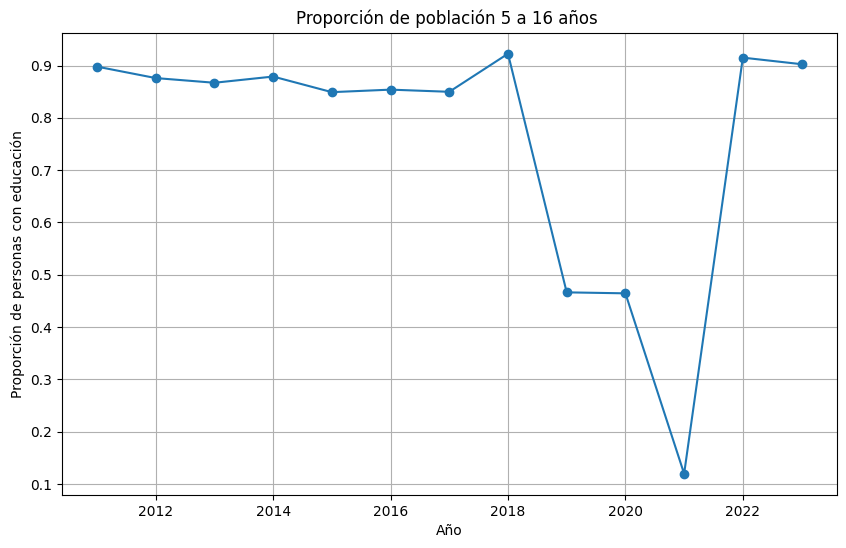

In [24]:
import matplotlib.pyplot as plt

# Calcular la proporción por año
cobertura_año = MEN.groupby("AÑO").agg(
    Estudiantes_5_16=("Estudiantes_5_16", "sum"),
    POBLACION_5_16=("POBLACION_5_16", "sum")
).reset_index()

cobertura_año["Tasa_cobertura"] = cobertura_año["Estudiantes_5_16"] / cobertura_año["POBLACION_5_16"]

# Graficar
plt.figure(figsize=(10,6))
plt.plot(cobertura_año["AÑO"], cobertura_año["Tasa_cobertura"], marker="o")

plt.title("Proporción de población 5 a 16 años ")
plt.xlabel("Año")
plt.ylabel("Proporción de personas con educación")
plt.grid(True)
plt.show()

## CNC

In [25]:
path_2018 = 'd2018.xlsx'
CNC2018 = pd.read_excel(path_2018)

path_2023 = 'd2023.xlsx'
CNC2023 = pd.read_excel(path_2023)

In [26]:
print(len(CNC2018.columns))
print(len(CNC2023.columns))

867
1173


In [27]:
selected_columns_2018 = [
    # Bloque 1: Geográficas
    'LAT_1', 'LONG_1', 'SECTOR', 'SECCION', 'MANZANA',

    # Bloque 2: # Sociodemográficas
    'EDAD', 'RANGO_EDAD', 'DH', 'PA', 'PB', 'PD', 'PB1', 'SEXO', 'ESTRATO',

    # Bloque 3: Administrativas
    'ID', 'FECHAINI', 'FECHAFIN', 'DIREC_VIVI', 'ESTUDIO', 'ENTREVISTADOR',

    # Bloque 4: Uso de internet
    'P7', 'P8', 'P9', 'P10', 'P11',

    # Bloque 5: Equipamiento de la vivienda
    'P15', 'P16_1', 'P16_2', 'P16_3', 'P16_4', 'P16_5', 'P16_6', 'P16_7',
    'P16_8', 'P16_9', 'P16_10', 'P16_11', 'P17', 'P19', 'P21',

    # Bloque 6: Conectividad del hogar
    'P27', 'P29',

    # Bloque 8: Percepciones sobre internet
    'P33', 'P34', 'P35', 'P36_1', 'P36_2', 'P36_3', 'P36_4',

    # Bloque 9: Comercio electrónico
    'P56', 'P57', 'P58', 'P59', 'P64', 'NIVEL_PIRAMIDEAJUSTA'
]
CNC2018_col_sel = CNC2018[selected_columns_2018]
CNC2018_col_sel

,LAT_1,LONG_1,SECTOR,SECCION,MANZANA,EDAD,RANGO_EDAD,DH,PA,PB,...,P36_1,P36_2,P36_3,P36_4,P56,P57,P58,P59,P64,NIVEL_PIRAMIDEAJUSTA
0,10.952493,-74.777018,2201,8,3,69,7,5,2,8001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,203,1,13,56,6,4,1,5001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,203,1,13,64,6,0,1,5001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,6.299582,-75.550590,203,2,2,38,4,8,1,5001,...,3.0,7.0,13.0,21.0,9.0,NaN,NaN,NaN,9.0,1
4,7.090175,-73.145032,798,2,25,43,4,8,5,68001,...,NaN,910.0,17.0,NaN,9.0,NaN,NaN,NaN,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,7.086000,-70.757413,0,0,0,18,2,4,5,81001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1
3479,7.063045,-70.758203,0,0,0,36,4,6,5,81001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0
3480,7.080648,-70.753662,0,0,0,18,2,8,5,81001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0
3481,7.063063,-70.758190,2,7,8,29,3,9,5,81001,...,NaN,NaN,NaN,2322.0,NaN,NaN,NaN,NaN,9.0,2


In [28]:
selected_columns_2023 = [
    'GPSLONG',  # Longitud GPS
    'GPSLAT',   # Latitud GPS
    'GPSALT',   # Altitud GPS
    'GPSPRECISION',  # Precisión del GPS
    'REGION_BASE',  # Región base
    'REGIONAL',  # Regional
    'MUNICIPIO_BASE',  # Municipio base
    'MUNICIPIO',  # Municipio
    'DANE',  # Código DANE
    'POINT_X',  # Coordenada X
    'POINT_Y',  # Coordenada Y
    'ESTRATO',  # Estrato socioeconómico
    'SECTOR',  # Sector
    'SECCION',  # Sección
    'MANZANA',  # Manzana
    'PB1',
    'TIPO_ENCUESTA',  # Tipo de encuesta
    'TIPO',  # Tipo de vivienda o encuesta
    'GENERO',  # Género del entrevistado
    'EDAD',  # Edad del entrevistado
    'PERSONAS',  # Número de personas en el hogar
    'PERSONAS_GEN',  # Distribución de género por personas
    'GENERO_SEL',  # Género de la persona seleccionada
    'REDAD',  # Rango de edad
    'ALEATORIO_PDET',  # Indicador de muestreo aleatorio en zonas PDET
    'VERIFICA',  # Validación o verificación del encuestado
    'DIRECCION_FILTRO',  # Dirección registrada
    'B4_1', #Pregunta B4.1 Formulario
    'B4_2', #Pregunta B4.2 Formulario
    'B4_4_TOTAL', #Pregunta B4.4 Formulario
    'B4_5_TOTAL', #Pregunta B4.5 Formulario
    'B4_7', #Pregunta B4.7 Formulario
    'B5_1', 'B5_2_1', 'B5_2_2', 'B5_2_3', 'B5_2_4', 'B5_2_5', 'B5_2_6', 'B5_2_7',
    'B5_2_8', 'B5_2_9', 'B5_2_10', 'B5_2_11', 'B5_2_12', 'B5_3_1', 'B5_3_2', 'B5_3_3',
    'B5_3_4', 'B5_3_5', 'B5_3_6', 'B5_3_7', 'B5_3_8', 'B5_3_9', 'B5_3_10', 'B5_3_11',
    'B5_3_12', 'B5_6', 'B5_8', 'B6_1', 'B6_3', 'B7_1', 'B7_2', 'B8_1_1', 'B8_1_2', 'B8_1_3',
    'B8_1_4', 'B8_1_5', 'B8_1_6', 'B8_1_7', 'B8_1_8', 'B8_1_9', 'B8_2_1', 'B8_2_2',
    'B8_2_3', 'B8_2_4', 'B8_2_5', 'B8_2_6', 'B8_2_7', 'B8_2_8', 'B8_2_9', 'B8_2_10',
    'B8_2_11', 'B8_2_12', 'B8_2_13', 'B8_2_14', 'B8_2_15', 'B8_2_16', 'B8_2_17',
    'B8_2_18', 'B8_2_19', 'B8_2_20', 'B8_2_21', 'B8_2_22', 'B9_1', 'B9_2', 'nivel_piramide', 'B9_7'
]

CNC2023_col_sel = CNC2023[selected_columns_2023]
CNC2023_col_sel

,GPSLONG,GPSLAT,GPSALT,GPSPRECISION,REGION_BASE,REGIONAL,MUNICIPIO_BASE,MUNICIPIO,DANE,POINT_X,...,B8_2_17,B8_2_18,B8_2_19,B8_2_20,B8_2_21,B8_2_22,B9_1,B9_2,nivel_piramide,B9_7
0,73.136622,7.113799,9.219000e+15,14.0,5.0,5,NaN,8,68001,73.136564,...,5.0,5.0,5.0,5.0,5.0,3.0,7,9.0,1,9
1,72.513637,7.892464,3.220000e+02,11.0,5.0,5,NaN,13,54001,72.514909,...,4.0,4.0,4.0,4.0,4.0,4.0,7,9.0,1,9
2,72.513735,7.892379,3.208000e+16,10.0,5.0,5,NaN,13,54001,72.514909,...,NaN,NaN,NaN,NaN,NaN,NaN,3,7.0,0,9
3,72.535536,7.899648,2.114980e+05,5.0,5.0,5,NaN,13,54001,72.535004,...,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,0,9
4,72.536171,7.898150,2.984000e+15,4.0,5.0,5,NaN,13,54001,72.535004,...,8.0,8.0,5.0,5.0,5.0,8.0,4,102.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,74.066290,4.843900,2.581400e+14,28.0,NaN,1,NaN,32,25175,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,9,NaN,2,2
4175,NaN,NaN,NaN,NaN,NaN,1,NaN,32,25175,NaN,...,5.0,5.0,5.0,5.0,2.0,5.0,5,5.0,1,2
4176,74.055293,4.857498,2.581200e+15,4.0,NaN,1,NaN,32,25175,NaN,...,1.0,1.0,5.0,5.0,5.0,2.0,7,701.0,3,9
4177,74.056633,4.853827,NaN,1000.0,4.0,1,NaN,32,25175,74.053638,...,8.0,8.0,8.0,4.0,8.0,8.0,9,NaN,1,9


In [29]:
CNC2018_col_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LAT_1                 2977 non-null   float64
 1   LONG_1                2977 non-null   float64
 2   SECTOR                3483 non-null   int64  
 3   SECCION               3483 non-null   int64  
 4   MANZANA               3483 non-null   int64  
 5   EDAD                  3483 non-null   int64  
 6   RANGO_EDAD            3483 non-null   int64  
 7   DH                    3483 non-null   int64  
 8   PA                    3483 non-null   int64  
 9   PB                    3483 non-null   int64  
 10  PD                    3483 non-null   int64  
 11  PB1                   3483 non-null   int64  
 12  SEXO                  3483 non-null   int64  
 13  ESTRATO               3483 non-null   int64  
 14  ID                    3483 non-null   int64  
 15  FECHAINI             

In [30]:
CNC2023_col_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GPSLONG           3643 non-null   float64
 1   GPSLAT            3643 non-null   float64
 2   GPSALT            3508 non-null   float64
 3   GPSPRECISION      3643 non-null   float64
 4   REGION_BASE       3042 non-null   float64
 5   REGIONAL          4179 non-null   int64  
 6   MUNICIPIO_BASE    2 non-null      float64
 7   MUNICIPIO         4179 non-null   int64  
 8   DANE              4179 non-null   int64  
 9   POINT_X           3041 non-null   float64
 10  POINT_Y           3041 non-null   float64
 11  ESTRATO           4179 non-null   int64  
 12  SECTOR            4179 non-null   int64  
 13  SECCION           4179 non-null   int64  
 14  MANZANA           4179 non-null   int64  
 15  PB1               4179 non-null   int64  
 16  TIPO_ENCUESTA     4179 non-null   int64  


In [31]:
# Verificar nulos
missing_percent_2018 = CNC2018_col_sel.isna().mean() * 100

missing_percent_2018

,0
LAT_1,14.527706
LONG_1,14.527706
SECTOR,0.000000
SECCION,0.000000
MANZANA,0.000000
EDAD,0.000000
RANGO_EDAD,0.000000
DH,0.000000
PA,0.000000
PB,0.000000


In [32]:
# Verificar nulos
missing_percent_2023 = CNC2023_col_sel.isna().mean() * 100

missing_percent_2023

,0
GPSLONG,12.826035
GPSLAT,12.826035
GPSALT,16.056473
GPSPRECISION,12.826035
REGION_BASE,27.207466
...,...
B8_2_22,10.169897
B9_1,0.000000
B9_2,50.059823
nivel_piramide,0.000000


## ICFES

In [33]:
# Eliminar registros de estudiantes que residen por fuera de Colombia
ICFES = ICFES[ICFES['ESTU_PAIS_RESIDE'] == 'COLOMBIA']
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343561 entries, 0 to 1354637
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERIODO                1343561 non-null  int64  
 1   ESTU_CONSECUTIVO       1343561 non-null  object 
 2   ESTU_GENERO            1343512 non-null  object 
 3   ESTU_COD_RESIDE_MCPIO  1341698 non-null  float64
 4   ESTU_MCPIO_RESIDE      1341698 non-null  object 
 5   ESTU_PAIS_RESIDE       1343561 non-null  object 
 6   FAMI_ESTRATOVIVIENDA   1056825 non-null  object 
 7   FAMI_TIENEINTERNET     1065562 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 92.3+ MB


In [34]:
# Eliminar periodos anteriores a 2012
periodos_a_eliminar = [20102, 20111, 20112, 20101]
ICFES = ICFES[~ICFES['PERIODO'].isin(periodos_a_eliminar)]
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343561 entries, 0 to 1354637
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERIODO                1343561 non-null  int64  
 1   ESTU_CONSECUTIVO       1343561 non-null  object 
 2   ESTU_GENERO            1343512 non-null  object 
 3   ESTU_COD_RESIDE_MCPIO  1341698 non-null  float64
 4   ESTU_MCPIO_RESIDE      1341698 non-null  object 
 5   ESTU_PAIS_RESIDE       1343561 non-null  object 
 6   FAMI_ESTRATOVIVIENDA   1056825 non-null  object 
 7   FAMI_TIENEINTERNET     1065562 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 92.3+ MB


In [35]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(ICFES[ICFES.isnull().sum(axis=1) >= i])/len(ICFES),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 21.58, 2: 20.46, 3: 0.14, 4: 0.14, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [36]:
# Eliminar registros con más de 2 columnas vacías
ICFES = ICFES[ICFES.isnull().sum(axis=1) <= 2]
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1341701 entries, 0 to 1354637
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERIODO                1341701 non-null  int64  
 1   ESTU_CONSECUTIVO       1341701 non-null  object 
 2   ESTU_GENERO            1341654 non-null  object 
 3   ESTU_COD_RESIDE_MCPIO  1341696 non-null  float64
 4   ESTU_MCPIO_RESIDE      1341696 non-null  object 
 5   ESTU_PAIS_RESIDE       1341701 non-null  object 
 6   FAMI_ESTRATOVIVIENDA   1056818 non-null  object 
 7   FAMI_TIENEINTERNET     1065562 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 92.1+ MB


In [37]:
# Eliminar registros con exactamente 2 columnas faltantes
ICFES = ICFES[ICFES.isnull().sum(axis=1) != 2]
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068706 entries, 0 to 1353585
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERIODO                1068706 non-null  int64  
 1   ESTU_CONSECUTIVO       1068706 non-null  object 
 2   ESTU_GENERO            1068659 non-null  object 
 3   ESTU_COD_RESIDE_MCPIO  1068706 non-null  float64
 4   ESTU_MCPIO_RESIDE      1068706 non-null  object 
 5   ESTU_PAIS_RESIDE       1068706 non-null  object 
 6   FAMI_ESTRATOVIVIENDA   1056813 non-null  object 
 7   FAMI_TIENEINTERNET     1065557 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.4+ MB


In [38]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(ICFES[ICFES.isnull().sum(axis=1) >= i])/len(ICFES),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 1.41, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [39]:
# Mostrar registros con al menos un campo faltante
registros_con_faltantes = ICFES[ICFES.isnull().any(axis=1)]

registros_con_faltantes

,PERIODO,ESTU_CONSECUTIVO,ESTU_GENERO,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
70,20181,SB11201810032558,M,11001.0,BOGOTÁ D.C.,COLOMBIA,NaN,Si
336,20181,SB11201810026724,M,76001.0,CALI,COLOMBIA,NaN,Si
478,20181,SB11201810010241,M,52001.0,PASTO,COLOMBIA,NaN,Si
512,20181,SB11201810025647,M,76147.0,CARTAGO,COLOMBIA,NaN,Si
611,20181,SB11201810038235,M,11001.0,BOGOTÁ D.C.,COLOMBIA,NaN,Si
...,...,...,...,...,...,...,...,...
1315067,20232,SB11202340576174,M,47170.0,CHIVOLO,COLOMBIA,NaN,Si
1315068,20232,SB11202340330995,M,17777.0,SUPÍA,COLOMBIA,NaN,No
1315137,20232,SB11202340246697,M,52258.0,EL TABLÓN DE GÓMEZ,COLOMBIA,NaN,No
1315248,20232,SB11202340118932,F,5001.0,MEDELLÍN,COLOMBIA,Estrato 2,NaN


In [40]:
# Imputación de la variable 'ESTU_GENERO' con la moda
# Calcular la moda de la columna 'ESTU_GENERO'
moda_genero = ICFES['ESTU_GENERO'].mode()[0]

# Reemplazar los valores faltantes con la moda
ICFES['ESTU_GENERO'].fillna(moda_genero, inplace=True)

# Verificar si la imputación fue exitosa
print(ICFES['ESTU_GENERO'].isnull().sum())

0


/tmp/ipython-input-699813981.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ICFES['ESTU_GENERO'].fillna(moda_genero, inplace=True)


In [41]:
# Imputar 'FAMI_ESTRATOVIVIENDA' y 'FAMI_TIENEINTERNET' por la moda dentro de cada grupo de 'ESTU_COD_RESIDE_MCPIO'
for columna in ['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']:
    # Imputación por la moda dentro de cada grupo
    ICFES[columna] = ICFES.groupby('ESTU_COD_RESIDE_MCPIO')[columna].transform(lambda x: x.fillna(x.mode()[0]))

# Verificación
print(ICFES[['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']].isnull().sum())

FAMI_ESTRATOVIVIENDA    0
FAMI_TIENEINTERNET      0
dtype: int64


In [42]:
ICFES.head(10)

,PERIODO,ESTU_CONSECUTIVO,ESTU_GENERO,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
0,20181,SB11201810006731,F,76111.0,GUADALAJARA DE BUGA,COLOMBIA,Estrato 3,Si
1,20181,SB11201810029450,M,11001.0,BOGOTÁ D.C.,COLOMBIA,Estrato 5,Si
3,20181,SB11201810007399,F,76001.0,CALI,COLOMBIA,Estrato 3,Si
4,20181,SB11201810026048,M,11001.0,BOGOTÁ D.C.,COLOMBIA,Estrato 4,Si
5,20181,SB11201810055369,F,15238.0,DUITAMA,COLOMBIA,Estrato 1,Si
6,20181,SB11201810027977,F,11001.0,BOGOTÁ D.C.,COLOMBIA,Estrato 2,Si
7,20181,SB11201810022640,M,76520.0,PALMIRA,COLOMBIA,Estrato 1,Si
10,20181,SB11201810022535,F,76520.0,PALMIRA,COLOMBIA,Estrato 3,No
11,20181,SB11201810009211,F,11001.0,BOGOTÁ D.C.,COLOMBIA,Estrato 6,Si
12,20181,SB11201810027646,F,11001.0,BOGOTÁ D.C.,COLOMBIA,Estrato 6,Si


In [43]:
# Revisar consistencia
for column in ICFES.columns:
    print(f"Valores únicos en '{column}': {ICFES[column].unique()}")

Valores únicos en 'PERIODO': [20181 20182 20231 20232]
Valores únicos en 'ESTU_CONSECUTIVO': ['SB11201810006731' 'SB11201810029450' 'SB11201810007399' ...
 'SB11202340487715' 'SB11202340610694' 'SB11202340007026']
Valores únicos en 'ESTU_GENERO': ['F' 'M']
Valores únicos en 'ESTU_COD_RESIDE_MCPIO': [76111. 11001. 76001. ... 27086. 91536. 99572.]
Valores únicos en 'ESTU_MCPIO_RESIDE': ['GUADALAJARA DE BUGA' 'BOGOTÁ D.C.' 'CALI' ... 'BELÉN DE BAJIRÁ'
 'PUERTO ARICA' 'TAMBORA']
Valores únicos en 'ESTU_PAIS_RESIDE': ['COLOMBIA']
Valores únicos en 'FAMI_ESTRATOVIVIENDA': ['Estrato 3' 'Estrato 5' 'Estrato 4' 'Estrato 1' 'Estrato 2' 'Estrato 6'
 'Sin Estrato']
Valores únicos en 'FAMI_TIENEINTERNET': ['Si' 'No']


In [44]:
# Eliminar ESTU_PAIS_RESIDE
ICFES = ICFES.drop('ESTU_PAIS_RESIDE', axis=1)
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068706 entries, 0 to 1353585
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERIODO                1068706 non-null  int64  
 1   ESTU_CONSECUTIVO       1068706 non-null  object 
 2   ESTU_GENERO            1068706 non-null  object 
 3   ESTU_COD_RESIDE_MCPIO  1068706 non-null  float64
 4   ESTU_MCPIO_RESIDE      1068706 non-null  object 
 5   FAMI_ESTRATOVIVIENDA   1068706 non-null  object 
 6   FAMI_TIENEINTERNET     1068706 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 65.2+ MB


In [45]:
# Codificar acceso
ICFES["FAMI_TIENEINTERNET"] = ICFES["FAMI_TIENEINTERNET"].map({"Si": 1, "No": 0}).astype(int)

In [46]:
# Crear variable año
ICFES["Año"] = ICFES["PERIODO"].astype(str).str[:4].astype(int)

In [47]:
# Agrupar por municipio y año
ICFES = ICFES.groupby(["ESTU_COD_RESIDE_MCPIO", "ESTU_MCPIO_RESIDE", "Año"], as_index=False).agg(
    HOGARES_INTERNET=("FAMI_TIENEINTERNET", "sum"),
    POBLACIÓN_ICFES=("FAMI_TIENEINTERNET", "count"))

In [48]:
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ESTU_COD_RESIDE_MCPIO  2233 non-null   float64
 1   ESTU_MCPIO_RESIDE      2233 non-null   object 
 2   Año                    2233 non-null   int64  
 3   HOGARES_INTERNET       2233 non-null   int64  
 4   POBLACIÓN_ICFES        2233 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 87.4+ KB


In [49]:
ICFES.head()

,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,Año,HOGARES_INTERNET,POBLACIÓN_ICFES
0,5001.0,MEDELLÍN,2018,21663,26759
1,5001.0,MEDELLÍN,2023,22457,25502
2,5002.0,ABEJORRAL,2018,75,202
3,5002.0,ABEJORRAL,2023,110,184
4,5004.0,ABRIAQUÍ,2018,6,28


In [50]:
# Resumen por año
tabla_internet = ICFES.groupby("Año").agg(
    HOGARES_INTERNET=("HOGARES_INTERNET", "sum"),
    POBLACIÓN_ICFES=("POBLACIÓN_ICFES", "sum")
).reset_index()

# Agregar la tasa (opcional)
tabla_internet["TASA_INTERNET"] = tabla_internet["HOGARES_INTERNET"] / tabla_internet["POBLACIÓN_ICFES"]

tabla_internet


,Año,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET
0,2018,320240,537575,0.595712
1,2023,390970,531131,0.736108


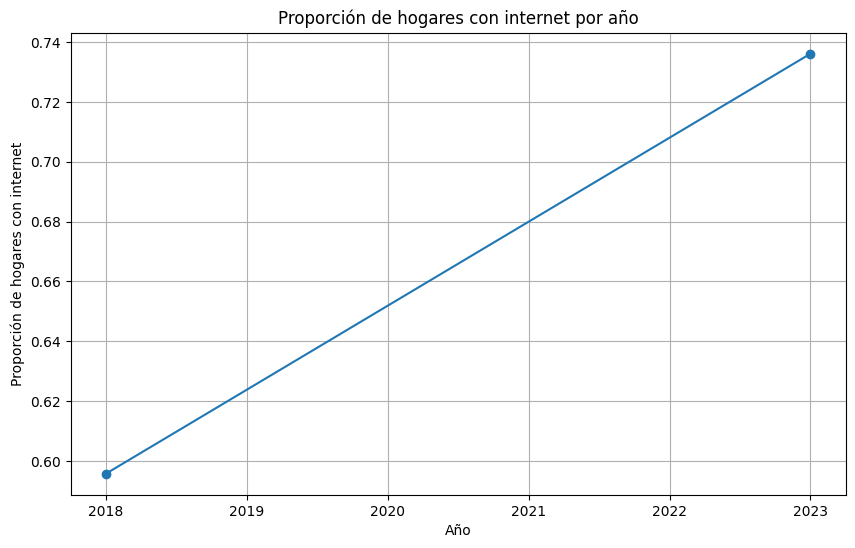

In [51]:
import matplotlib.pyplot as plt

# Calcular la proporción por año
internet_por_año = ICFES.groupby("Año").agg(
    HOGARES_INTERNET=("HOGARES_INTERNET", "sum"),
    POBLACIÓN_ICFES=("POBLACIÓN_ICFES", "sum")
).reset_index()

internet_por_año["Tasa_Internet"] = internet_por_año["HOGARES_INTERNET"] / internet_por_año["POBLACIÓN_ICFES"]

# Graficar
plt.figure(figsize=(10,6))
plt.plot(internet_por_año["Año"], internet_por_año["Tasa_Internet"], marker="o")

plt.title("Proporción de hogares con internet por año")
plt.xlabel("Año")
plt.ylabel("Proporción de hogares con internet")
plt.grid(True)
plt.show()

## Consolidar datos

In [52]:
def to_dane5(x):
    """Convierte a string de 5 dígitos (p.ej. 5001 -> '05001', 11001 -> '11001')."""
    if pd.isna(x):
        return pd.NA
    try:
        s = str(int(float(x)))
    except Exception:
        s = str(x).strip()
        s = ''.join(ch for ch in s if ch.isdigit())
    return s.zfill(5)

def map_genero(val):
    """Normaliza género a 1=Masculino, 2=Femenino (admite códigos o texto)."""
    if pd.isna(val):
        return pd.NA
    v = str(val).strip().upper()
    if v in {"1", "M", "H", "HOMBRE", "MASCULINO"}:
        return 1
    if v in {"2", "F", "MUJER", "FEMENINO"}:
        return 2
    # En CNC 2023 ya viene 1-2 intenta convertir
    try:
        n = int(float(v))
        if n in (1, 2):
            return n
    except Exception:
        pass
    return pd.NA

In [53]:
# 1) CNC como BASE (2018 y 2023)
# ---- 2018
cnc18 = CNC2018_col_sel.copy()

# Llave municipio
cnc18["DANE5"] = cnc18["PB"].apply(to_dane5)
cnc18["AÑO"] = 2018

# Normalización de nombres y campos
cnc18 = cnc18.rename(columns={
    "LAT_1": "GPSLAT",
    "LONG_1": "GPSLONG",
    "RANGO_EDAD": "REDAD",
    "DIREC_VIVI": "DIRECCION_FILTRO",
    "NIVEL_PIRAMIDEAJUSTA": "NIVEL_PIRAMIDE",
    "PD": "PERSONAS"
})

# Genero desde SEXO -> GENERO (1=M, 2=F)
cnc18["GENERO"] = cnc18["SEXO"].apply(map_genero)

# Campos que no existen en 2018 (para homogeneidad con 2023)
for col_abs in ["GPSALT", "GPSPRECISION", "POINT_X", "POINT_Y",
                "REGION_BASE", "REGIONAL", "MUNICIPIO_BASE",
                "TIPO_ENCUESTA", "TIPO", "PERSONAS", "PERSONAS_GEN",
                "GENERO_SEL", "ALEATORIO_PDET", "VERIFICA", "DANE"]:
    if col_abs not in cnc18.columns:
        cnc18[col_abs] = pd.NA

# Asegurar DANE numérico tipo texto según diccionario
cnc18["DANE"] = cnc18["DANE5"]

# 2023
cnc23 = CNC2023_col_sel.copy()
cnc23["AÑO"] = 2023
cnc23["DANE5"] = cnc23["DANE"].apply(to_dane5)

# Normalizaciones
cnc23 = cnc23.rename(columns={
    "nivel_piramide": "NIVEL_PIRAMIDE",
    'B4_1': 'P7',
    'B4_4_TOTAL': 'P10',
    'B5_1': 'P15',
    'B6_1': 'P27',
    'B6_3': 'P29',
    'B7_1': 'P33',
    'B7_2': 'P34',
    'B9_1': 'P56',
    'B9_3': 'P57',
    'B9_7': 'P64',
    'B4_2': 'P9'
})
# Genero ya es 1-2, map_genero
cnc23["GENERO"] = cnc23["GENERO"].apply(map_genero)

# Unir bases CNC
CNC_BASE = pd.concat([cnc18, cnc23], ignore_index=True, sort=False)

# Eliminar columnas que no coinciden en ambas bases o son irrelevantes
cols_to_drop = [
    "P16_1", "P16_2", "P16_3", "P16_4", "P16_5", "P16_6", "P16_7", "P16_8", "P16_9", "P16_10", "P16_11",
    "P17", "P19", "P21", "P35", "P36_1", "P36_2", "P36_3", "P36_4", "P58", "P59",
    "B5_3_4", "B5_3_12", "B8_1_4", "B8_2_3", "B8_2_11", "B8_2_18",
    "B5_3_5", "B5_6", "B8_1_5", "B8_2_4", "B8_2_12", "B8_2_19",
    "B5_3_6", "B5_8", "B8_1_6", "B8_2_5", "B8_2_13", "B8_2_20",
    "B5_2_11", "B5_3_7", "B8_1_7", "B8_2_6", "B8_2_14", "B8_2_21",
    "B5_2_12", "B5_3_8", "B8_1_8", "B8_2_7", "B8_2_15", "B8_2_22",
    "B5_3_1", "B5_3_9", "B8_1_1", "B8_1_9", "B8_2_8", "B8_2_16",
    "B5_3_2", "B5_3_10", "B8_1_2", "B8_2_1", "B8_2_9", "B8_2_17", "B9_2",
    "B5_3_3", "B5_3_11", "B8_1_3", "B8_2_2", "B8_2_10",  "B5_2_1", "B5_2_2", "B5_2_3", "B5_2_4", "B5_2_5",
    "B5_2_6", "B5_2_7", "B5_2_8", "B5_2_9", "B5_2_10", "DH", "PA", "FECHAINI", "FECHAFIN", "ESTUDIO", "ENTREVISTADOR", "VERIFICA",
    "ALEATORIO_PDET", "SEXO", "GENERO_SEL", "GPSALT", "GPSPRECISION", "POINT_X", "POINT_Y", "REGION_BASE", "REGIONAL", "TIPO_ENCUESTA",
    "TIPO", "PERSONAS_GEN", "B4_5_TOTAL", "B4_7", "ID", "P8", "P11", "MUNICIPIO_BASE", "MUNICIPIO", "DANE", "PB"
]

CNC_BASE = CNC_BASE.drop(columns=cols_to_drop)

/tmp/ipython-input-1047317945.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  CNC_BASE = pd.concat([cnc18, cnc23], ignore_index=True, sort=False)


In [54]:
CNC_BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GPSLAT            6620 non-null   float64
 1   GPSLONG           6620 non-null   float64
 2   SECTOR            7662 non-null   int64  
 3   SECCION           7662 non-null   int64  
 4   MANZANA           7662 non-null   int64  
 5   EDAD              7662 non-null   int64  
 6   REDAD             7662 non-null   int64  
 7   PERSONAS          7662 non-null   int64  
 8   PB1               7662 non-null   int64  
 9   ESTRATO           7662 non-null   int64  
 10  DIRECCION_FILTRO  7662 non-null   object 
 11  P7                7662 non-null   int64  
 12  P9                6683 non-null   float64
 13  P10               7662 non-null   object 
 14  P15               7662 non-null   object 
 15  P27               5978 non-null   float64
 16  P29               4870 non-null   float64


In [55]:
orden_columnas = [
    "AÑO", "GPSLAT", "GPSLONG", "SECTOR", "SECCION", "MANZANA",
    "DIRECCION_FILTRO", "DANE5", "PB1", "PERSONAS", "EDAD", "REDAD",
    "GENERO", "ESTRATO", "P7", "P9", "P10", "P15", "P27", "P29",
    "P33", "P34", "P56", "P57", "P64", "NIVEL_PIRAMIDE"
]

CNC_BASE = CNC_BASE[orden_columnas]

In [56]:
CNC_BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AÑO               7662 non-null   int64  
 1   GPSLAT            6620 non-null   float64
 2   GPSLONG           6620 non-null   float64
 3   SECTOR            7662 non-null   int64  
 4   SECCION           7662 non-null   int64  
 5   MANZANA           7662 non-null   int64  
 6   DIRECCION_FILTRO  7662 non-null   object 
 7   DANE5             7662 non-null   object 
 8   PB1               7662 non-null   int64  
 9   PERSONAS          7662 non-null   int64  
 10  EDAD              7662 non-null   int64  
 11  REDAD             7662 non-null   int64  
 12  GENERO            7662 non-null   int64  
 13  ESTRATO           7662 non-null   int64  
 14  P7                7662 non-null   int64  
 15  P9                6683 non-null   float64
 16  P10               7662 non-null   object 


In [57]:
CNC_BASE

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,...,P10,P15,P27,P29,P33,P34,P56,P57,P64,NIVEL_PIRAMIDE
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,...,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,...,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,...,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,...,01,02,1.0,2.0,1.0,1.0,9.0,NaN,9.0,1
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,...,0102035106071112131549182023,010304,1.0,1.0,2.0,1.0,9.0,NaN,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,...,010624253043,0304,1.0,1.0,1.0,1.0,9.0,NaN,2.0,2
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,...,112123485741,01030508,1.0,1.0,1.0,1.0,5.0,NaN,2.0,1
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,...,01025106071112131415491820232529323335363743,0305,1.0,2.0,1.0,1.0,7.0,NaN,9.0,3
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,...,01020351060711,0203,1.0,1.0,4.0,1.0,9.0,NaN,9.0,1


In [58]:
CNC_BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AÑO               7662 non-null   int64  
 1   GPSLAT            6620 non-null   float64
 2   GPSLONG           6620 non-null   float64
 3   SECTOR            7662 non-null   int64  
 4   SECCION           7662 non-null   int64  
 5   MANZANA           7662 non-null   int64  
 6   DIRECCION_FILTRO  7662 non-null   object 
 7   DANE5             7662 non-null   object 
 8   PB1               7662 non-null   int64  
 9   PERSONAS          7662 non-null   int64  
 10  EDAD              7662 non-null   int64  
 11  REDAD             7662 non-null   int64  
 12  GENERO            7662 non-null   int64  
 13  ESTRATO           7662 non-null   int64  
 14  P7                7662 non-null   int64  
 15  P9                6683 non-null   float64
 16  P10               7662 non-null   object 


In [59]:
# 2) MEN (filtrar 2018/2023 y armar KPIs)
# MEN: ['CÓDIGO_MUNICIPIO','MUNICIPIO','AÑO','POBLACION_5_16','Estudiantes_5_16']

men = MEN.copy()
men = men[men["AÑO"].isin([2018, 2023])].copy()
men["DANE5"] = men["CÓDIGO_MUNICIPIO"].apply(to_dane5)
men["PROP_EDUC_5_16_MEN"] = (men["Estudiantes_5_16"] / men["POBLACION_5_16"]).replace([np.inf, -np.inf], np.nan)

In [60]:
men

,CÓDIGO_MUNICIPIO,MUNICIPIO,AÑO,POBLACION_5_16,Estudiantes_5_16,DANE5,PROP_EDUC_5_16_MEN
10,5001,Medellín,2018,384358.0,372366.0,05001,0.968800
15,5001,Medellín,2023,377562.0,362233.0,05001,0.959400
23,5002,Abejorral,2018,3814.0,2907.0,05002,0.762192
28,5002,Abejorral,2023,3634.0,2703.0,05002,0.743808
36,5004,Abriaquí,2018,517.0,349.0,05004,0.675048
...,...,...,...,...,...,...,...
14552,99524,La Primavera,2023,2659.0,2551.0,99524,0.959383
14560,99624,Santa Rosalía,2018,1187.0,954.0,99624,0.803707
14565,99624,Santa Rosalía,2023,1159.0,972.0,99624,0.838654
14573,99773,Cumaribo,2018,23902.0,9862.0,99773,0.412601


In [61]:
# Diccionario DANE5 --> nombre municipio
mpio_nombres = men[["DANE5", "MUNICIPIO"]].drop_duplicates(subset=["DANE5"]).rename(columns={"MUNICIPIO": "MUNICIPIO_NOMBRE"})

men_kpis = men[["DANE5", "AÑO", "POBLACION_5_16", "Estudiantes_5_16", "PROP_EDUC_5_16_MEN"]].copy()
assert not men_kpis.duplicated(["DANE5", "AÑO"]).any(), "MEN tiene llaves duplicadas DANE5-AÑO"

# 3) ICFES (ya agregado por municipio-año)
# ICFES: ['ESTU_COD_RESIDE_MCPIO','ESTU_MCPIO_RESIDE','Año','HOGARES_INTERNET','POBLACIÓN_ICFES']

icfes = ICFES.copy()
icfes = icfes[icfes["Año"].isin([2018, 2023])].copy()
icfes["DANE5"] = icfes["ESTU_COD_RESIDE_MCPIO"].apply(to_dane5)
icfes = icfes.rename(columns={"Año": "AÑO"})
icfes["TASA_INTERNET_ICFES"] = (icfes["HOGARES_INTERNET"] / icfes["POBLACIÓN_ICFES"]).replace([np.inf, -np.inf], np.nan)

icfes_kpis = icfes[["DANE5", "AÑO", "HOGARES_INTERNET", "POBLACIÓN_ICFES", "TASA_INTERNET_ICFES"]].copy()
assert not icfes_kpis.duplicated(["DANE5", "AÑO"]).any(), "ICFES tiene llaves duplicadas DANE5-AÑO"

# 4) MERGE sobre CNC (left) y agregar nombre de municipio

cnc_enriquecido = (
    CNC_BASE
    .merge(men_kpis, on=["DANE5", "AÑO"], how="left")
    .merge(icfes_kpis, on=["DANE5", "AÑO"], how="left")
    .merge(mpio_nombres, on="DANE5", how="left")
)

# Cobertura de los merges
print("Filas CNC_BASE:", len(CNC_BASE))
print("Cobertura MEN:", cnc_enriquecido["POBLACION_5_16"].notna().mean().round(3))
print("Cobertura ICFES:", cnc_enriquecido["POBLACIÓN_ICFES"].notna().mean().round(3))

# 5) Panel municipal (agregado municipio-año)
#    — métricas de CNC (conteo, edad promedio, % mujeres) + MEN + ICFES

def pct_mujeres(s):
    s = pd.to_numeric(s, errors="coerce")
    return np.nan if s.isna().all() else (s.eq(2).mean())

cnc_mpio = (
    cnc_enriquecido
    .groupby(["DANE5", "MUNICIPIO_NOMBRE", "AÑO"], as_index=False)
    .agg(
        ENCUESTAS_CNC=("AÑO", "size"),
        EDAD_PROM=("EDAD", "mean"),
        PROP_MUJERES=("GENERO", pct_mujeres),
        NIVEL_PIRAMIDE_PROM=("NIVEL_PIRAMIDE", "mean")
    )
)

panel_mpio = (
    cnc_mpio
    .merge(men_kpis, on=["DANE5", "AÑO"], how="left")
    .merge(icfes_kpis, on=["DANE5", "AÑO"], how="left")
)

# 6) Columnas clave para revisión rápida

cols_cnc = [c for c in [
    "AÑO","DANE5","MUNICIPIO_NOMBRE","GPSLAT","GPSLONG","EDAD","REDAD","GENERO",
    "NIVEL_PIRAMIDE","SECTOR","SECCION","MANZANA",
    "POBLACION_5_16","Estudiantes_5_16","PROP_EDUC_5_16_MEN",
    "HOGARES_INTERNET","POBLACIÓN_ICFES","TASA_INTERNET_ICFES"
] if c in cnc_enriquecido.columns]

cols_panel = [c for c in [
    "AÑO","DANE5","MUNICIPIO_NOMBRE",
    "ENCUESTAS_CNC","EDAD_PROM","PROP_MUJERES","NIVEL_PIRAMIDE_PROM",
    "POBLACION_5_16","Estudiantes_5_16","PROP_EDUC_5_16_MEN",
    "HOGARES_INTERNET","POBLACIÓN_ICFES","TASA_INTERNET_ICFES"
] if c in panel_mpio.columns]

print("\nVista rápida CNC enriquecido:")
display(cnc_enriquecido[cols_cnc])

# print("\nVista rápida Panel municipal:")
# display(panel_mpio[cols_panel].head(10))

# (Opcional) Guardar
# cnc_enriquecido.to_parquet("data/cnc_enriquecido_2018_2023.parquet", index=False)
# panel_mpio.to_parquet("data/panel_mpio_2018_2023.parquet", index=False)

Filas CNC_BASE: 7662
Cobertura MEN: 1.0
Cobertura ICFES: 1.0

Vista rápida CNC enriquecido:


,AÑO,DANE5,MUNICIPIO_NOMBRE,GPSLAT,GPSLONG,EDAD,REDAD,GENERO,NIVEL_PIRAMIDE,SECTOR,SECCION,MANZANA,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES
0,2018,08001,Barranquilla,10.952493,-74.777018,69,7,2,0,2201,8,3,233015.0,235368.0,1.010098,11425,16359,0.698392
1,2018,05001,Medellín,NaN,NaN,56,6,2,0,203,1,13,384358.0,372366.0,0.968800,21663,26759,0.809559
2,2018,05001,Medellín,NaN,NaN,64,6,2,0,203,1,13,384358.0,372366.0,0.968800,21663,26759,0.809559
3,2018,05001,Medellín,6.299582,-75.550590,38,4,1,1,203,2,2,384358.0,372366.0,0.968800,21663,26759,0.809559
4,2018,68001,Bucaramanga,7.090175,-73.145032,43,4,1,2,798,2,25,94655.0,95781.0,1.011896,5355,6446,0.830748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,25175,Chía,4.843900,74.066290,69,7,1,2,1,3,19,24997.0,27437.0,1.097612,1715,1839,0.932572
7658,2023,25175,Chía,NaN,NaN,24,2,1,1,1,2,7,24997.0,27437.0,1.097612,1715,1839,0.932572
7659,2023,25175,Chía,4.857498,74.055293,47,5,1,3,1,7,5,24997.0,27437.0,1.097612,1715,1839,0.932572
7660,2023,25175,Chía,4.853827,74.056633,58,6,2,1,2,6,35,24997.0,27437.0,1.097612,1715,1839,0.932572


In [69]:
# Agregar nombre municipio

DIVIPOLA = pd.read_csv("DIVIPOLA.csv", delimiter=",")
DANE = DIVIPOLA.copy()
DANE["DANE5"] = DIVIPOLA["Código Municipio"].apply(to_dane5)

In [70]:
Completo = cnc_enriquecido.merge(
    DANE[["DANE5", "Nombre Municipio", "Nombre Departamento"]],
    on="DANE5",
    how="left"
)
Completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AÑO                  7662 non-null   int64  
 1   GPSLAT               6620 non-null   float64
 2   GPSLONG              6620 non-null   float64
 3   SECTOR               7662 non-null   int64  
 4   SECCION              7662 non-null   int64  
 5   MANZANA              7662 non-null   int64  
 6   DIRECCION_FILTRO     7662 non-null   object 
 7   DANE5                7662 non-null   object 
 8   PB1                  7662 non-null   int64  
 9   PERSONAS             7662 non-null   int64  
 10  EDAD                 7662 non-null   int64  
 11  REDAD                7662 non-null   int64  
 12  GENERO               7662 non-null   int64  
 13  ESTRATO              7662 non-null   int64  
 14  P7                   7662 non-null   int64  
 15  P9                   6683 non-null   f

In [71]:
Completo

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,...,NIVEL_PIRAMIDE,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,...,0,233015.0,235368.0,1.010098,11425,16359,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,...,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,...,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,...,1,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,...,2,94655.0,95781.0,1.011896,5355,6446,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,...,2,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,...,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,...,3,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,...,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA


# Exploración y Análisis Descriptivo (EDA)

Este cuaderno realiza un análisis descriptivo de `df_data`.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn es opcional; si no está instalado, seguimos con matplotlib
# try:
#     import seaborn as sns
#     sns.set(style='whitegrid', context='notebook')
# except Exception:
#     sns = None

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11


In [74]:
# Carga opcional de datos si no existe df_data
df_data = Completo

## Resumen general y utilidades

In [75]:
def resumen_columnas(df: pd.DataFrame) -> pd.DataFrame:
    info = []
    for col in df.columns:
        s = df[col]
        dtype = str(s.dtype)
        n = len(s)
        n_null = s.isna().sum()
        p_null = (n_null / n * 100) if n else np.nan
        n_unique = s.nunique(dropna=True)
        example_vals = None
        if s.dtype == 'object' or str(s.dtype).startswith('string') or s.dtype.name == 'category':
            top_vals = s.dropna().value_counts().head(3).index.tolist()
            example_vals = ', '.join(map(str, top_vals)) if top_vals else ''
        row = {
            'columna': col,
            'dtype': dtype,
            'no_nulos': n - n_null,
            'nulos': n_null,
            '%_nulos': round(p_null, 2),
            'unicos': int(n_unique),
            'ejemplos': example_vals or ''
        }
        if np.issubdtype(s.dropna().dtype, np.number):
            desc = s.describe(percentiles=[0.25, 0.5, 0.75])
            row.update({
                'min': desc.get('min', np.nan),
                'p25': desc.get('25%', np.nan),
                'mediana': desc.get('50%', np.nan),
                'media': desc.get('mean', np.nan),
                'p75': desc.get('75%', np.nan),
                'max': desc.get('max', np.nan)
            })
        info.append(row)
    res = pd.DataFrame(info)
    orden = ['columna','dtype','no_nulos','nulos','%_nulos','unicos','ejemplos','min','p25','mediana','media','p75','max']
    cols = [c for c in orden if c in res.columns]
    return res[cols].sort_values('%_nulos', ascending=False) if '%_nulos' in res else res

def detectar_duplicados(df: pd.DataFrame) -> int:
    return int(df.duplicated().sum())

def columnas_constantes(df: pd.DataFrame) -> list:
    return [c for c in df.columns if df[c].nunique(dropna=False) <= 1]

def outliers_iqr(df: pd.DataFrame) -> pd.DataFrame:
    nums = df.select_dtypes(include=[np.number])
    rows = []
    for col in nums.columns:
        s = nums[col].dropna()
        if s.empty:
            continue
        q1, q3 = s.quantile(0.25), s.quantile(0.75)
        iqr = q3 - q1
        low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
        n_out = int(((nums[col] < low) | (nums[col] > high)).sum())
        rows.append({'columna': col, 'outliers': n_out, '%_outliers': round(100*n_out/len(nums), 2)})
    return pd.DataFrame(rows).sort_values('%_outliers', ascending=False)

def plot_missingness(df: pd.DataFrame):
    miss = df.isna().mean().sort_values(ascending=True) * 100
    if (miss > 0).any():
        miss = miss[miss > 0]
        miss.plot(kind='barh', color='#c44e52')
        plt.title('% de valores faltantes por columna')
        plt.xlabel('% faltantes')
        plt.ylabel('columna')
        plt.show()
    else:
        print('No hay valores faltantes.')

def plot_correlaciones(df: pd.DataFrame):
    nums = df.select_dtypes(include=[np.number])
    if nums.shape[1] < 2:
        print('No hay suficientes columnas numéricas para correlación.')
        return
    corr = nums.corr(numeric_only=True)
    if sns is not None:
        ax = sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
        ax.set_title('Mapa de calor de correlaciones (numéricas)')
        plt.show()
    else:
        plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar()
        plt.title('Mapa de calor de correlaciones (numéricas)')
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.columns)), corr.columns)
        plt.tight_layout(); plt.show()

def plot_distribuciones_numericas(df: pd.DataFrame, top_n: int = 8):
    nums = df.select_dtypes(include=[np.number])
    if nums.empty:
        print('No hay variables numéricas para graficar.')
        return
    cols = nums.var().sort_values(ascending=False).head(top_n).index.tolist()
    n = len(cols)
    ncols = 2
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4*nrows))
    axes = np.array(axes).reshape(-1)
    for i, col in enumerate(cols):
        ax = axes[i]
        if sns is not None:
            sns.histplot(df[col].dropna(), kde=True, ax=ax, color='#4c72b0')
        else:
            ax.hist(df[col].dropna(), bins=30, color='#4c72b0', alpha=0.8)
        ax.set_title(f'Distribución: {col}')
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(); plt.show()

def plot_categoricas(df: pd.DataFrame, top_n_cols: int = 6, top_n_vals: int = 10):
    cats = df.select_dtypes(include=['object', 'category', 'string'])
    if cats.empty:
        print('No hay variables categóricas para graficar.')
        return
    # Ordenar por cardinalidad ascendente para ver primero las de menos categorías
    cols = cats.nunique(dropna=False).sort_values().head(top_n_cols).index.tolist()
    n = len(cols); ncols = 2; nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4*nrows))
    axes = np.array(axes).reshape(-1)
    for i, col in enumerate(cols):
        ax = axes[i]
        vc = df[col].astype('string').value_counts(dropna=False).head(top_n_vals)
        vc.plot(kind='bar', color='#55a868', ax=ax)
        ax.set_title(f'Top valores: {col}')
        ax.set_ylabel('frecuencia')
        ax.tick_params(axis='x', labelrotation=45)
        for lbl in ax.get_xticklabels():
            lbl.set_horizontalalignment('right')
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(); plt.show()


## Ejecutar EDA sobre `df_data`

In [76]:
# Resumen general
print('Shape:', df_data.shape)
print('Duplicados:', detectar_duplicados(df_data))
consts = columnas_constantes(df_data)
print('Columnas constantes:', consts if consts else 'Ninguna')
res_cols = resumen_columnas(df_data)
display(res_cols.head(30))


Shape: (7662, 35)
Duplicados: 18
Columnas constantes: Ninguna


,columna,dtype,no_nulos,nulos,%_nulos,unicos,ejemplos,min,p25,mediana,media,p75,max
23,P57,float64,538,7124,92.98,5,,1.000000,2.000000,5.000000,3.814126,5.000000,5.000000e+00
19,P29,float64,4870,2792,36.44,3,,0.000000,1.000000,1.000000,1.191376,1.000000,2.000000e+00
18,P27,float64,5978,1684,21.98,13,,1.000000,1.000000,1.000000,4.668618,3.000000,9.900000e+01
20,P33,float64,6522,1140,14.88,6,,1.000000,1.000000,1.000000,1.805888,2.000000,6.000000e+00
21,P34,float64,6522,1140,14.88,5,,1.000000,1.000000,1.000000,1.387918,1.000000,5.000000e+00
1,GPSLAT,float64,6620,1042,13.60,5839,,-77.277221,4.432272,5.675870,6.140382,7.909766,1.126948e+01
2,GPSLONG,float64,6620,1042,13.60,5825,,-77.297173,-74.826292,73.115492,7.558627,75.484364,7.878275e+01
15,P9,float64,6683,979,12.78,50,,1.000000,2.000000,9.000000,62.729164,23.000000,4.321000e+03
22,P56,float64,6791,871,11.37,9,,1.000000,5.000000,9.000000,7.137240,9.000000,9.000000e+00
24,P64,float64,6804,858,11.20,9,,1.000000,9.000000,9.000000,8.059083,9.000000,9.000000e+00


In [77]:
# Estadísticos descriptivos
display(df_data.select_dtypes(include=[np.number]).describe().T)
display(df_data.select_dtypes(include=['object','category','string']).describe().T)


,count,mean,std,min,25%,50%,75%,max
AÑO,7662.0,2020.727095,2.489827,2018.000000,2018.000000,2023.000000,2023.000000,2.023000e+03
GPSLAT,6620.0,6.140382,3.417394,-77.277221,4.432272,5.675870,7.909766,1.126948e+01
GPSLONG,6620.0,7.558627,74.597830,-77.297173,-74.826292,73.115492,75.484364,7.878275e+01
SECTOR,7662.0,1993.167189,3216.746402,0.000000,13.000000,705.000000,2105.000000,9.999900e+04
SECCION,7662.0,12.033803,33.062799,0.000000,2.000000,3.000000,6.000000,9.990000e+02
MANZANA,7662.0,19.517750,117.912282,0.000000,4.000000,9.000000,17.000000,9.904000e+03
PB1,7662.0,1.111720,0.315042,1.000000,1.000000,1.000000,1.000000,2.000000e+00
PERSONAS,7662.0,3.521926,1.746042,1.000000,2.000000,3.000000,4.000000,1.500000e+01
EDAD,7662.0,40.037588,18.351039,12.000000,24.000000,38.000000,56.000000,7.900000e+01
REDAD,7662.0,3.978596,1.894850,1.000000,2.000000,4.000000,6.000000,7.000000e+00


,count,unique,top,freq
DIRECCION_FILTRO,7662,7500,99,22
DANE5,7662,72,11001,833
P10,7662,5070,88,1173
P15,7662,765,03,1939
MUNICIPIO_NOMBRE,7662,72,"Bogotá, D.C.",833
Nombre Municipio,7662,72,"BOGOTÁ, D.C.",833
Nombre Departamento,7662,26,ANTIOQUIA,1103


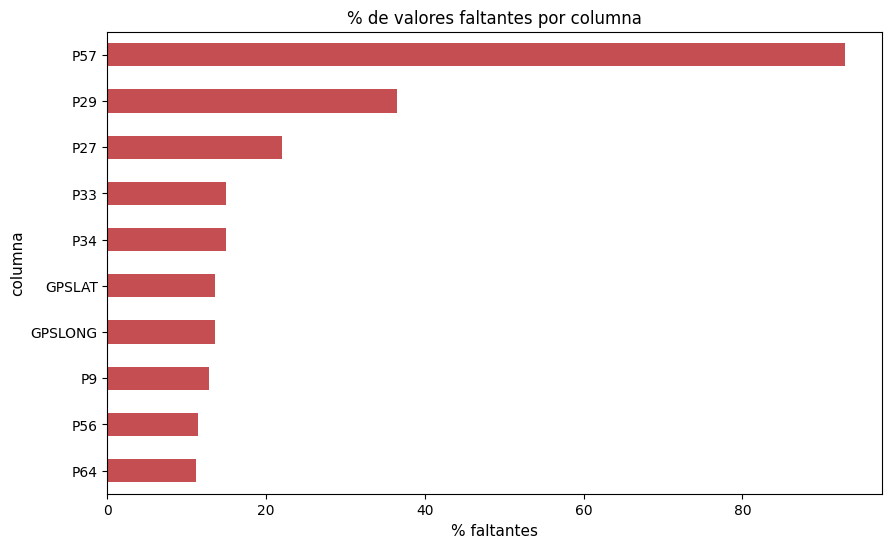

In [78]:
# Valores faltantes
plot_missingness(df_data)


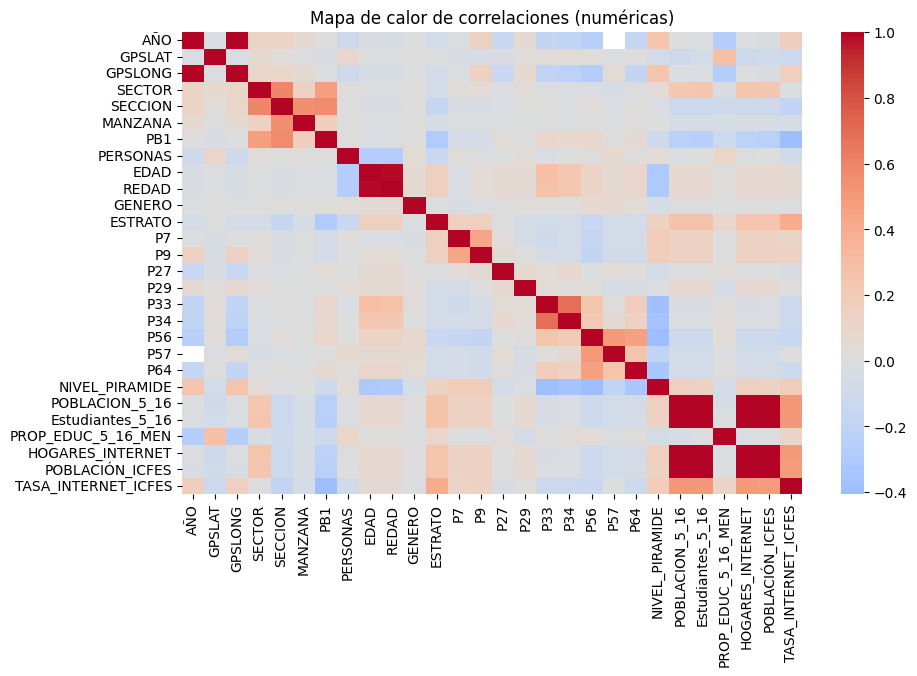

In [79]:
# Correlaciones entre variables numéricas
plot_correlaciones(df_data)


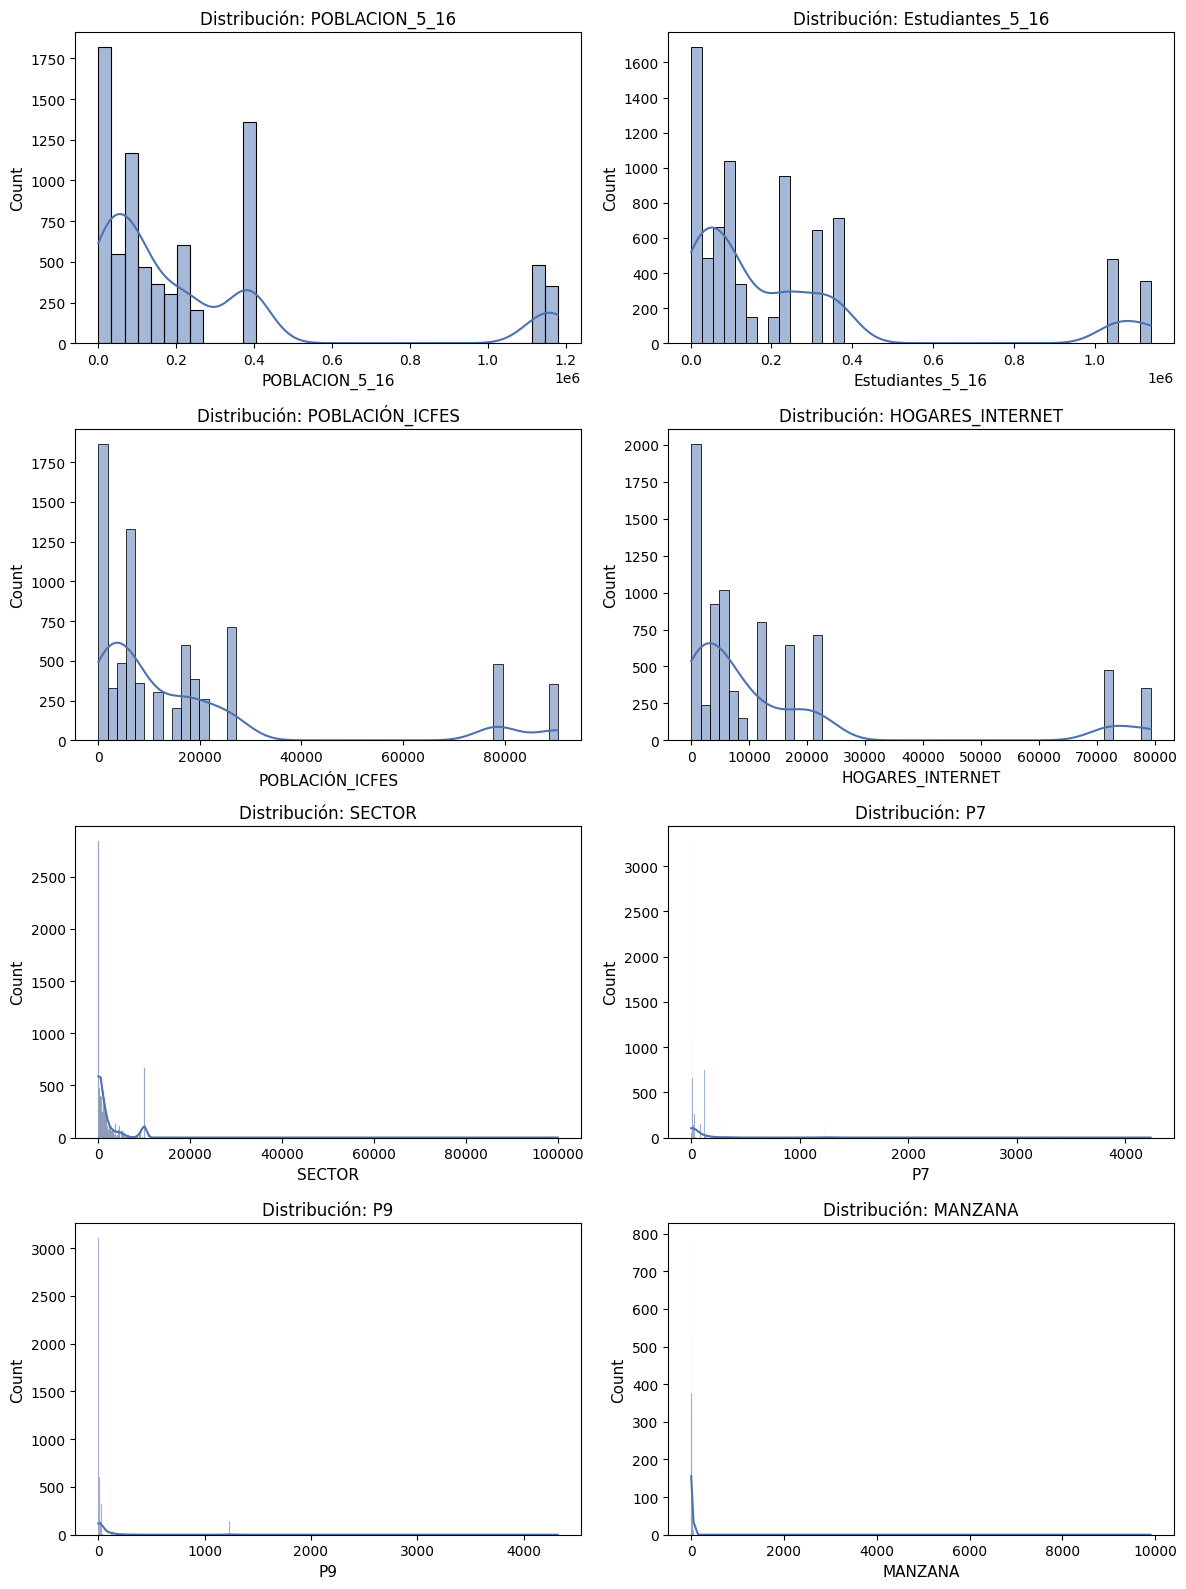

In [80]:
# Distribuciones numéricas
plot_distribuciones_numericas(df_data, top_n=8)


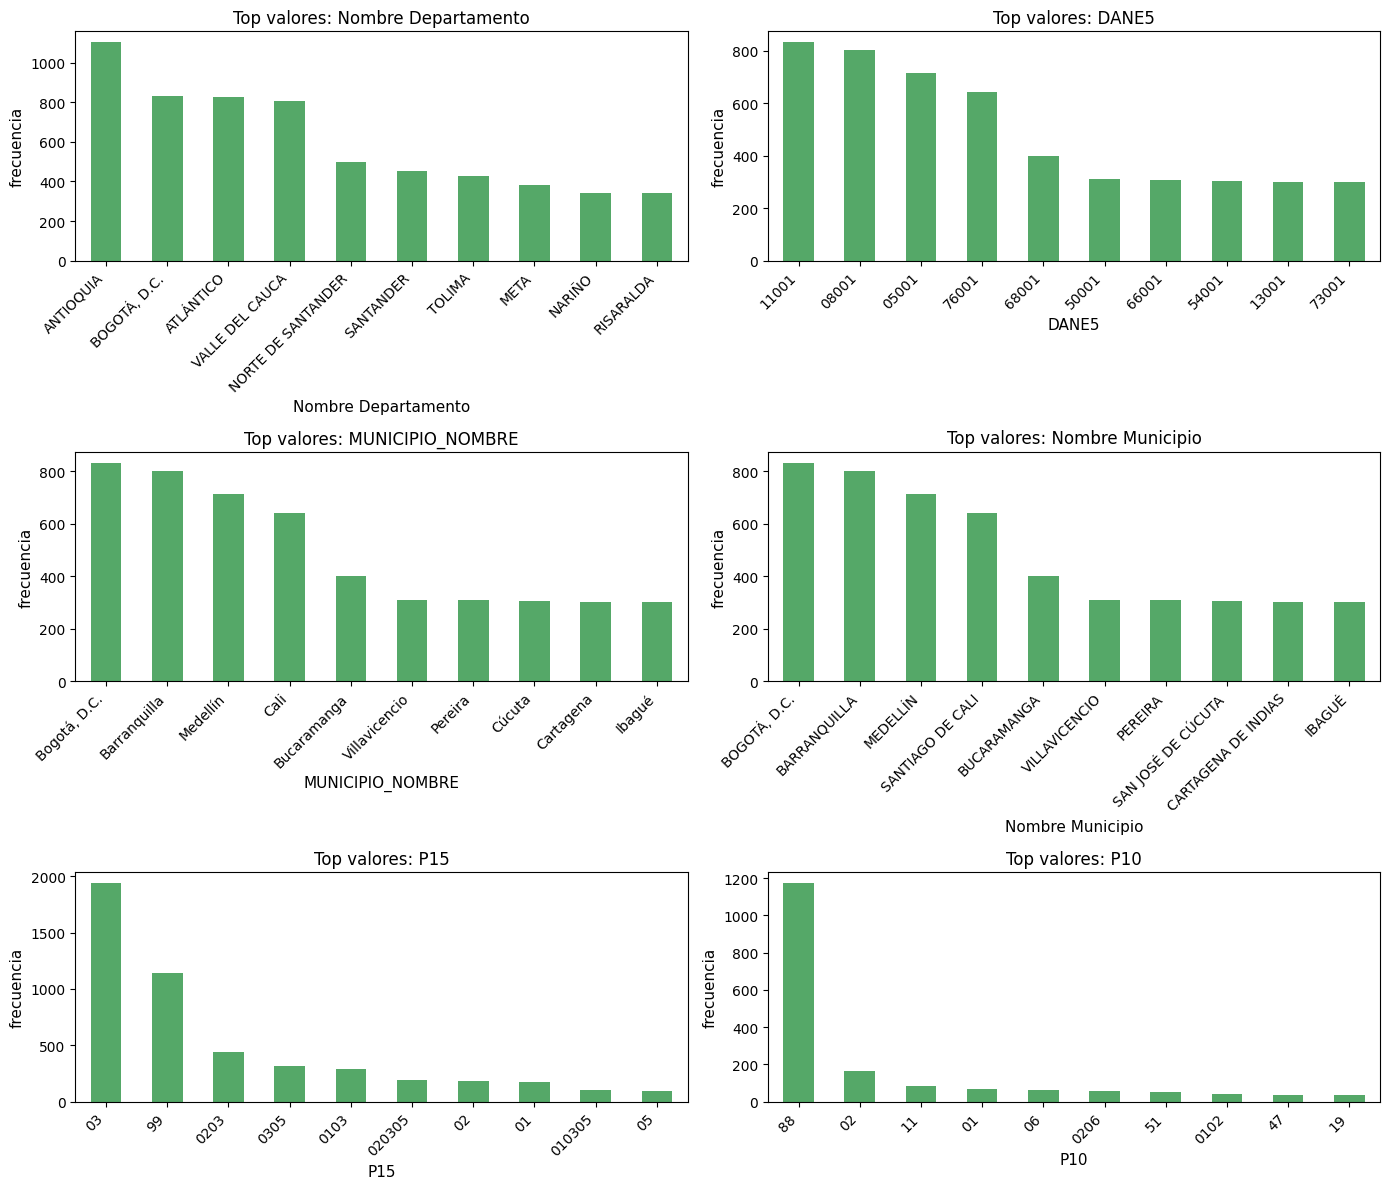

In [81]:
# Distribuciones categóricas
plot_categoricas(df_data, top_n_cols=6, top_n_vals=10)


In [82]:
# Detección simple de outliers por IQR
display(outliers_iqr(df_data))


,columna,outliers,%_outliers
12,P7,1582,20.65
20,P64,1537,20.06
15,P29,1416,18.48
17,P34,1192,15.56
13,P9,1175,15.34
14,P27,1057,13.80
3,SECTOR,951,12.41
16,P33,876,11.43
6,PB1,856,11.17
22,POBLACION_5_16,833,10.87


In [83]:
pd.set_option('display.max_columns', None)
df_data

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,EDAD,REDAD,GENERO,ESTRATO,P7,P9,P10,P15,P27,P29,P33,P34,P56,P57,P64,NIVEL_PIRAMIDE,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,69,7,2,2,9,9.0,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,233015.0,235368.0,1.010098,11425,16359,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,56,6,2,2,1,NaN,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,64,6,2,2,1,NaN,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,38,4,1,2,2,2.0,01,02,1.0,2.0,1.0,1.0,9.0,NaN,9.0,1,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,43,4,1,2,1234,234.0,0102035106071112131549182023,010304,1.0,1.0,2.0,1.0,9.0,NaN,8.0,2,94655.0,95781.0,1.011896,5355,6446,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,69,7,1,4,2,2.0,010624253043,0304,1.0,1.0,1.0,1.0,9.0,NaN,2.0,2,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,24,2,1,2,12,12.0,112123485741,01030508,1.0,1.0,1.0,1.0,5.0,NaN,2.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,47,5,1,2,231,123.0,01025106071112131415491820232529323335363743,0305,1.0,2.0,1.0,1.0,7.0,NaN,9.0,3,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,58,6,2,2,12,12.0,01020351060711,0203,1.0,1.0,4.0,1.0,9.0,NaN,9.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA


## Siguientes pasos sugeridos
- Revisar columnas con alto % de nulos y decidir imputación/eliminación.
- Explorar relaciones clave (pares de variables relevantes).
- Validar tipos (fechas, IDs) y posibles errores de captura.
- Generar features derivadas si avanzas a modelado.

## Tratamiento de datos

se crean variables dummies de la pregunta P7

In [84]:
df_data['P7'].unique()

array([   9,    1,    2, 1234,   12,  123,    3,   21,   31,  124,   13,
         14,   32,  134,  132,   23,  431,  213,  321, 1324,    4,  231,
       1243,   43, 3241,  341,  241,  312, 1432, 3412,   24, 2341, 2134,
         41,  324, 3124,  423, 3421, 1342,  314,  142,  421, 4123, 3214,
        432,   88, 3142,   42,  412,  143,  214,  342, 4231, 1423])

Función para manejar las categorías

In [85]:
def create_dummies_with_nan_handling(df, column_name, special_cases=None):
    """
    Crea columnas binarias (dummies) para cada número individual único en una columna,
    manejando casos especiales y dejando NaN en las nuevas columnas si el valor original es NaN.

    Args:
        df (pd.DataFrame): DataFrame original.
        column_name (str): Nombre de la columna a procesar.
        special_cases (list): Lista de valores que deben tratarse como casos completos (e.g., '88').

    Returns:
        pd.DataFrame: DataFrame con las columnas dummies agregadas.
    """
    if special_cases is None:
        special_cases = []

    # Crear un conjunto para almacenar cada número individual y los casos especiales
    all_numbers = set(special_cases)

    # Recorrer los valores únicos de la columna
    unique_values = df[column_name].dropna().astype(str).unique()

    for value in unique_values:
        if value in special_cases:
            all_numbers.add(value)  # Mantener el caso especial completo
        else:
            for char in value:
                if char.isdigit():  # Solo considerar caracteres numéricos individuales
                    all_numbers.add(char)

    # Convertir el conjunto en una lista ordenada
    all_numbers = sorted(all_numbers, key=lambda x: int(x))

    # Crear columnas dummies para cada número individual y casos especiales
    for number in all_numbers:
        dummy_name = f"{column_name}_{number}"
        df[dummy_name] = df[column_name].apply(
            lambda x: np.nan if pd.isna(x) else int(number in str(x))
        )
    df = df.drop(columns=[column_name])
    return df


Se crean las variables dummies

In [86]:
df_data_1 = create_dummies_with_nan_handling(df_data, "P7", special_cases=["9", "88"])
df_data_1['Servicios_Telecomunicaciones_No'] = df_data_1['P7_9']|df_data_1['P7_88']
df_data_1['Servicios_Telecomunicaciones_Si'] = df_data_1['P7_1']|df_data_1['P7_2']|df_data_1['P7_3']|df_data_1['P7_4']
df_data_1 = df_data_1.drop(['P7_9','P7_88','P7_1','P7_2','P7_3','P7_4'],axis=1)
df_data_1

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,EDAD,REDAD,GENERO,ESTRATO,P9,P10,P15,P27,P29,P33,P34,P56,P57,P64,NIVEL_PIRAMIDE,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento,Servicios_Telecomunicaciones_No,Servicios_Telecomunicaciones_Si
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,69,7,2,2,9.0,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,233015.0,235368.0,1.010098,11425,16359,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO,1,0
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,56,6,2,2,NaN,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,64,6,2,2,NaN,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,38,4,1,2,2.0,01,02,1.0,2.0,1.0,1.0,9.0,NaN,9.0,1,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,43,4,1,2,234.0,0102035106071112131549182023,010304,1.0,1.0,2.0,1.0,9.0,NaN,8.0,2,94655.0,95781.0,1.011896,5355,6446,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,69,7,1,4,2.0,010624253043,0304,1.0,1.0,1.0,1.0,9.0,NaN,2.0,2,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,24,2,1,2,12.0,112123485741,01030508,1.0,1.0,1.0,1.0,5.0,NaN,2.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,47,5,1,2,123.0,01025106071112131415491820232529323335363743,0305,1.0,2.0,1.0,1.0,7.0,NaN,9.0,3,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,58,6,2,2,12.0,01020351060711,0203,1.0,1.0,4.0,1.0,9.0,NaN,9.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1


Se crea las variables dummies de la pregunta P15

In [87]:
df_data['P15'].unique()

array(['99', '02', '010304', '03', '0203', '060701', '0103', '01030405',
       '0204030810', '01', '0103050608', '06', '0102', '01030405060708',
       '04', '0305', '0403', '0304', '020409', '0408', '020403', '010203',
       '01080903', '0102030406', '010307', '010203040809', '020305',
       '020306', '0203040708', '020304', '0205', '01030406', '030608',
       '05', '040203', '01020304050608', '010204', '0405', '010306',
       '0204', '010203040608', '0103050607', '0603', '0307', '02030406',
       '0102031005', '020305040610', '010305', '01020305', '0102030405',
       '020308', '010203040607', '01030507', '010203050608',
       '0204030506071011', '01020306', '050403', '030405', '0302',
       '01030508', '01020405', '0206', '010402', '0205060308', '030406',
       '0102030507080910', '010406', '0104', '0301020405', '0306',
       '060304', '0203050607', '02030508', '010205', '02030504',
       '02030405', '02030409', '02030405080910', '0501', '050103',
       '030206', '0301',

In [88]:
df_data_1['Dispositivos_hogar_No'] = df_data_1['P15']=="99"
df_data_1= df_data_1.drop(['P15'], axis=1)
df_data_1

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,EDAD,REDAD,GENERO,ESTRATO,P9,P10,P27,P29,P33,P34,P56,P57,P64,NIVEL_PIRAMIDE,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento,Servicios_Telecomunicaciones_No,Servicios_Telecomunicaciones_Si,Dispositivos_hogar_No
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,69,7,2,2,9.0,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,233015.0,235368.0,1.010098,11425,16359,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO,1,0,True
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,56,6,2,2,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,64,6,2,2,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,38,4,1,2,2.0,01,1.0,2.0,1.0,1.0,9.0,NaN,9.0,1,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,False
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,43,4,1,2,234.0,0102035106071112131549182023,1.0,1.0,2.0,1.0,9.0,NaN,8.0,2,94655.0,95781.0,1.011896,5355,6446,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,69,7,1,4,2.0,010624253043,1.0,1.0,1.0,1.0,9.0,NaN,2.0,2,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,24,2,1,2,12.0,112123485741,1.0,1.0,1.0,1.0,5.0,NaN,2.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,47,5,1,2,123.0,01025106071112131415491820232529323335363743,1.0,2.0,1.0,1.0,7.0,NaN,9.0,3,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,58,6,2,2,12.0,01020351060711,1.0,1.0,4.0,1.0,9.0,NaN,9.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False


Se crea variables dummies para la pregunta P27

In [89]:
df_data_1['P27']=df_data['P27'].astype(str).apply(lambda x: x.strip(".0"))
df_data_1['P27'].unique()


array(['nan', '1', '3', '9', '2', '88', '99', '77', '12', '21', '7'],
      dtype=object)

In [90]:
def create_dummies (x):
    if "1" in x or "2" in x or "3" in x:
        return True
    else:
        return False

df_data_1["conexion_hogar_si"]=df_data_1["P27"].apply(create_dummies)
df_data_1 = df_data_1.drop(["P27"], axis=1)
df_data_1

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,EDAD,REDAD,GENERO,ESTRATO,P9,P10,P29,P33,P34,P56,P57,P64,NIVEL_PIRAMIDE,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento,Servicios_Telecomunicaciones_No,Servicios_Telecomunicaciones_Si,Dispositivos_hogar_No,conexion_hogar_si
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,69,7,2,2,9.0,88,NaN,NaN,NaN,NaN,NaN,NaN,0,233015.0,235368.0,1.010098,11425,16359,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO,1,0,True,False
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,56,6,2,2,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True,False
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,64,6,2,2,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True,False
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,38,4,1,2,2.0,01,2.0,1.0,1.0,9.0,NaN,9.0,1,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,False,True
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,43,4,1,2,234.0,0102035106071112131549182023,1.0,2.0,1.0,9.0,NaN,8.0,2,94655.0,95781.0,1.011896,5355,6446,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,69,7,1,4,2.0,010624253043,1.0,1.0,1.0,9.0,NaN,2.0,2,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,24,2,1,2,12.0,112123485741,1.0,1.0,1.0,5.0,NaN,2.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,47,5,1,2,123.0,01025106071112131415491820232529323335363743,2.0,1.0,1.0,7.0,NaN,9.0,3,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,58,6,2,2,12.0,01020351060711,1.0,4.0,1.0,9.0,NaN,9.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True


crear variables dummies para pregunta P29

In [91]:
df_data_1['P29']=df_data['P29'].astype(str).apply(lambda x: x.strip(".0"))

In [92]:
def create_dummies_P29 (x):
    if "1" in x:
        return True
    else:
        return False

df_data_1["interrupciones_si"]=df_data_1["P29"].apply(create_dummies_P29)
df_data_1 = df_data_1.drop(["P29"], axis=1)
df_data_1

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,EDAD,REDAD,GENERO,ESTRATO,P9,P10,P33,P34,P56,P57,P64,NIVEL_PIRAMIDE,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento,Servicios_Telecomunicaciones_No,Servicios_Telecomunicaciones_Si,Dispositivos_hogar_No,conexion_hogar_si,interrupciones_si
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,69,7,2,2,9.0,88,NaN,NaN,NaN,NaN,NaN,0,233015.0,235368.0,1.010098,11425,16359,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO,1,0,True,False,False
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,56,6,2,2,NaN,88,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True,False,False
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,64,6,2,2,NaN,88,NaN,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True,False,False
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,38,4,1,2,2.0,01,1.0,1.0,9.0,NaN,9.0,1,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,False,True,False
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,43,4,1,2,234.0,0102035106071112131549182023,2.0,1.0,9.0,NaN,8.0,2,94655.0,95781.0,1.011896,5355,6446,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER,0,1,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,69,7,1,4,2.0,010624253043,1.0,1.0,9.0,NaN,2.0,2,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,24,2,1,2,12.0,112123485741,1.0,1.0,5.0,NaN,2.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,47,5,1,2,123.0,01025106071112131415491820232529323335363743,1.0,1.0,7.0,NaN,9.0,3,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,False
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,58,6,2,2,12.0,01020351060711,4.0,1.0,9.0,NaN,9.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True


crear variables dummies para la pregunta 33

In [93]:
def create_dummies_P33 (x):
    if x == np.nan:
        return False
    else:
        return True

df_data_1["frec_uso_si"]=df_data_1["P33"].apply(create_dummies_P33)
df_data_1 = df_data_1.drop(["P33"], axis=1)
df_data_1

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,EDAD,REDAD,GENERO,ESTRATO,P9,P10,P34,P56,P57,P64,NIVEL_PIRAMIDE,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento,Servicios_Telecomunicaciones_No,Servicios_Telecomunicaciones_Si,Dispositivos_hogar_No,conexion_hogar_si,interrupciones_si,frec_uso_si
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,69,7,2,2,9.0,88,NaN,NaN,NaN,NaN,0,233015.0,235368.0,1.010098,11425,16359,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO,1,0,True,False,False,True
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,56,6,2,2,NaN,88,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True,False,False,True
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,64,6,2,2,NaN,88,NaN,NaN,NaN,NaN,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True,False,False,True
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,38,4,1,2,2.0,01,1.0,9.0,NaN,9.0,1,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,False,True,False,True
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,43,4,1,2,234.0,0102035106071112131549182023,1.0,9.0,NaN,8.0,2,94655.0,95781.0,1.011896,5355,6446,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER,0,1,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,69,7,1,4,2.0,010624253043,1.0,9.0,NaN,2.0,2,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True,True
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,24,2,1,2,12.0,112123485741,1.0,5.0,NaN,2.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True,True
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,47,5,1,2,123.0,01025106071112131415491820232529323335363743,1.0,7.0,NaN,9.0,3,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,False,True
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,58,6,2,2,12.0,01020351060711,1.0,9.0,NaN,9.0,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True,True


Se calcula una métrica que captura la relación entre los hogares con internet del municipio y la cantidad de hogares del municipio

In [94]:
df_data_1['dens_int'] = 1- (df_data_1['HOGARES_INTERNET']/df_data_1['POBLACIÓN_ICFES'])

In [95]:
df_data_1.to_csv("data_procesada.csv", index=False)

Se grafica el mapa de densidad de hogares con internet para identificar las zonas del pais dentro de los datos con menor acceso

In [96]:
from google.colab import files
import geopandas as gpd

In [99]:
uploaded = files.upload()

Saving gadm41_COL_0.cpg to gadm41_COL_0.cpg
Saving gadm41_COL_0.dbf to gadm41_COL_0.dbf
Saving gadm41_COL_0.prj to gadm41_COL_0.prj
Saving gadm41_COL_0.shp to gadm41_COL_0.shp
Saving gadm41_COL_0.shx to gadm41_COL_0.shx
Saving gadm41_COL_1.cpg to gadm41_COL_1.cpg
Saving gadm41_COL_1.dbf to gadm41_COL_1.dbf
Saving gadm41_COL_1.prj to gadm41_COL_1.prj
Saving gadm41_COL_1.shp to gadm41_COL_1 (1).shp
Saving gadm41_COL_1.shx to gadm41_COL_1.shx
Saving gadm41_COL_2.cpg to gadm41_COL_2.cpg
Saving gadm41_COL_2.dbf to gadm41_COL_2.dbf
Saving gadm41_COL_2.prj to gadm41_COL_2.prj
Saving gadm41_COL_2.shp to gadm41_COL_2 (1).shp
Saving gadm41_COL_2.shx to gadm41_COL_2.shx


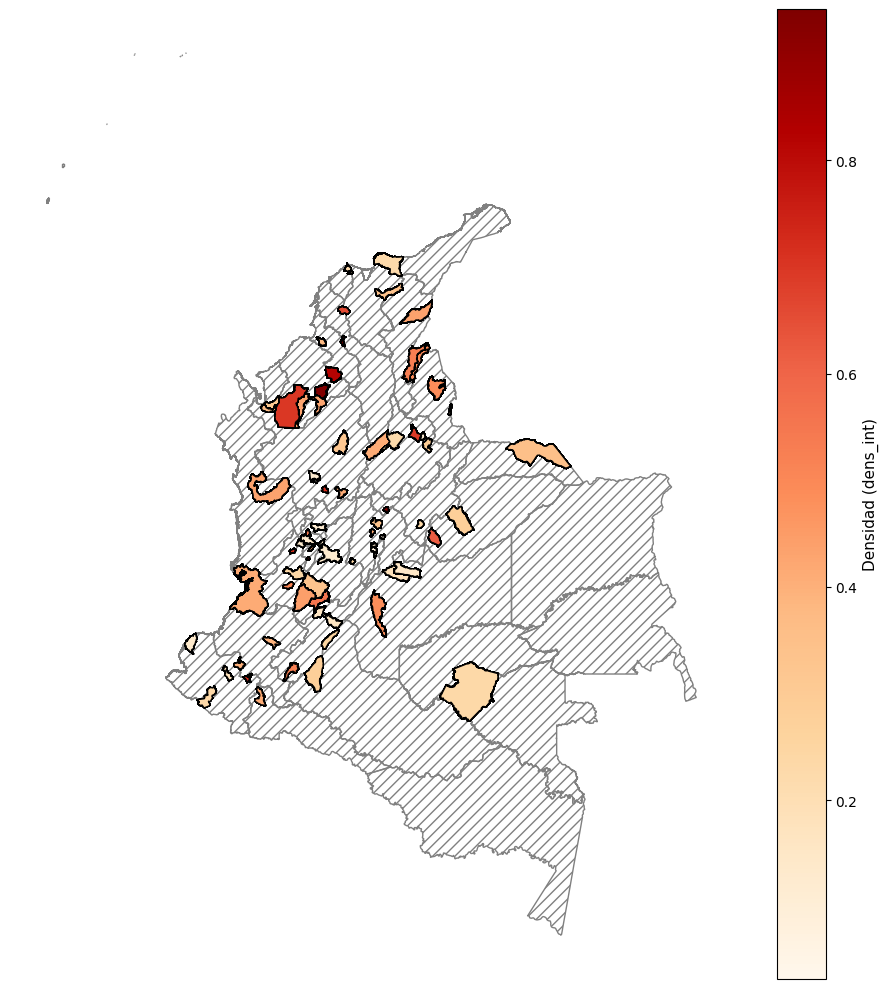

In [100]:
import geopandas as gpd

gdf = gpd.read_file("gadm41_COL_2.shp")
gdf1 = gpd.read_file("gadm41_COL_1.shp")
# print(gdf.head())
gdf = gdf.merge(df_data_1, left_on="NAME_2", right_on="MUNICIPIO_NOMBRE", how="left")

# Graficar
fig, ax = plt.subplots(figsize=(10,10))
gdf1.plot(
    ax=ax,
    facecolor="none",        # sin relleno sólido
    edgecolor="grey",   # bordes
    hatch="///",             # patrón de líneas (///, \\\, xx, ++, **, .., etc.)
    alpha=1                # transparencia del hatch
)
gdf.plot(
    ax=ax,
    column="dens_int",      # columna de colores
    cmap="OrRd",            # paleta de colores (puedes cambiar a 'viridis', 'Blues', etc.)
    edgecolor="black",
    legend=True,            # para que salga la barra de colores
    legend_kwds={"label": "Densidad (dens_int)", "orientation": "vertical"}
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

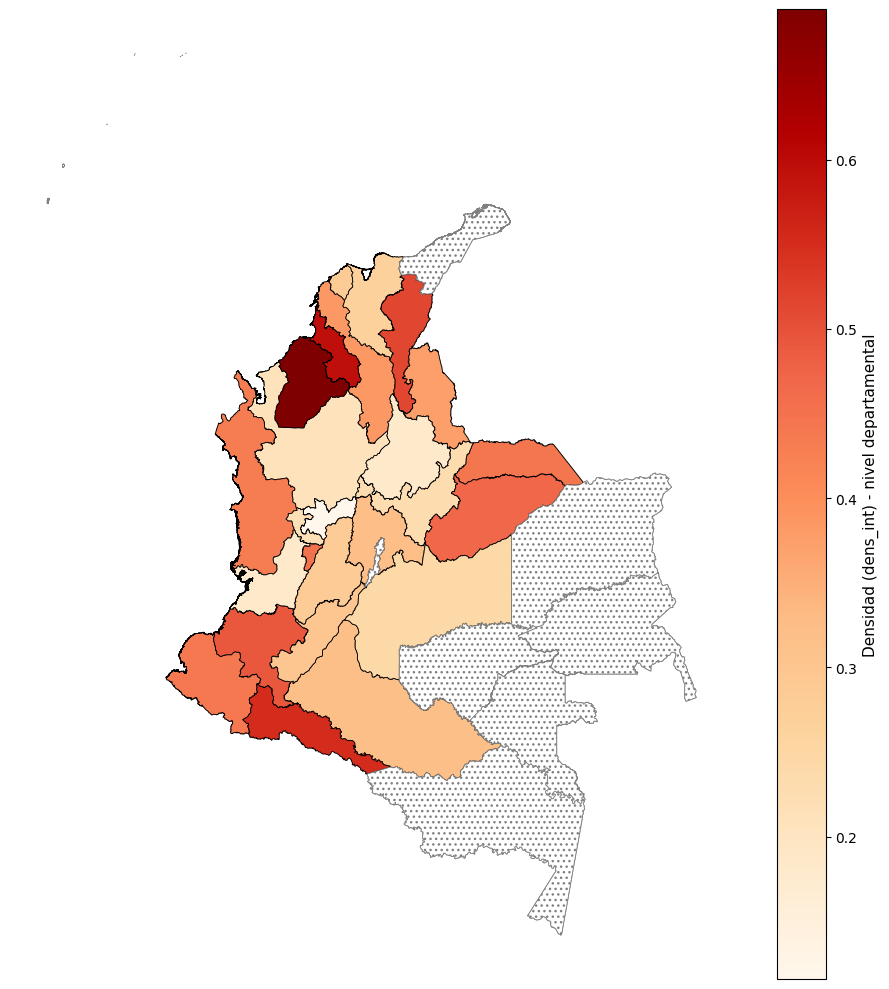

In [101]:

# --- 1) Cargar shapes ---

gdf_mpio = gpd.read_file("gadm41_COL_2.shp")
gdf_dpto = gpd.read_file("gadm41_COL_1.shp")

df_tmp = df_data_1.copy()
df_tmp["Nombre Departamento_norm"] = df_tmp["Nombre Departamento"].str.upper().str.normalize("NFKD").str.encode("ascii","ignore").str.decode("utf-8")
gdf_dpto["NAME_1_norm"] = gdf_dpto["NAME_1"].str.upper().str.normalize("NFKD").str.encode("ascii","ignore").str.decode("utf-8")

df_dpto = (
    df_tmp.groupby("Nombre Departamento_norm", as_index=False)
          .agg(dens_int=("dens_int", "mean"),  # <-- ajusta aquí si quieres otra función
               n_mpios=("MUNICIPIO_NOMBRE", "nunique"))
)

gdf_dpto_join = gdf_dpto.merge(
    df_dpto,
    left_on="NAME_1_norm",
    right_on="Nombre Departamento_norm",
    how="left"
)

# --- 4) Plot: hatch de fondo + coropleta por departamento ---
fig, ax = plt.subplots(figsize=(10, 10))

# Fondo con hachurado
gdf_country = gdf_dpto  # contorno Colombia
gdf_country.plot(
    ax=ax,
    facecolor="none",
    edgecolor="grey",
    hatch="///",
    alpha=1,
    linewidth=0.7
)

# Coropleta departamental por dens_int
gdf_dpto_join.plot(
    ax=ax,
    column="dens_int",
    cmap="OrRd",
    edgecolor="black",
    linewidth=0.6,
    legend=True,
    legend_kwds={"label": "Densidad (dens_int) - nivel departamental", "orientation": "vertical"},
    missing_kwds={
        "color": "white",
        "edgecolor": "grey",
        "hatch": "...",
        "label": "Sin dato"
    }
)

# Trazar límites municipales muy finos por contexto (opcional)
# gdf_mpio.boundary.plot(ax=ax, color="lightgrey", linewidth=0.2)

ax.set_axis_off()
plt.tight_layout()
plt.show()